In [616]:
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import mean_absolute_error
import keras
from keras import metrics, regularizers
from keras.models import Sequential
from keras.layers import Dense
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import Adam
from sklearn import model_selection
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Ridge

%matplotlib inline

In [587]:
df=pd.read_csv("dataset/kc_house_data.csv")

In [588]:
df.head(10)

id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   
5    101930     1.0           0     0  ...     11        3890           1530   
6      6819     2.0           0     0  ...      7        1715              0   
7      9711     1.0           0     0  ...      7        1060              0   
8      7470     1.0           0     0  ...      7        1050            730   
9      6560     2.0           0     0  ...      7        1890              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   
5      2001             0    98053  47.6561 -122.005           4760   
6      1995             0    98003  47.3097 -122.327           2238   
7      1963             0    98198  47.4095 -122.315           1650   
8      1960             0    98146  47.5123 -122.337           1780   
9      2003             0    98038  47.3684 -122.031           2390   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  
5      101930  
6        6819  
7        9711  
8        8113  
9        7570  

[10 rows x 21 columns]

In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [590]:
df.drop('id', axis='columns', inplace=True)

In [591]:
df['date'] = pd.to_datetime(df['date'])
df['datediff'] = (datetime.strptime("2023-01-01","%Y-%m-%d")-df['date']).dt.days
df.drop(columns = 'date', axis='columns', inplace=True)


In [592]:
df['yrs_since_construction'] = 2023-df['yr_built']
df.drop(columns = 'yr_built', axis='columns', inplace=True)

In [593]:
df['yrs_since_renovation'] = np.where(df['yr_renovated'] == 0, 0,2023-df['yr_renovated'])
df.drop(columns = 'yr_renovated', axis='columns', inplace=True)

In [594]:
df.head(10)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   221900.0         3       1.00         1180      5650     1.0           0   
1   538000.0         3       2.25         2570      7242     2.0           0   
2   180000.0         2       1.00          770     10000     1.0           0   
3   604000.0         4       3.00         1960      5000     1.0           0   
4   510000.0         3       2.00         1680      8080     1.0           0   
5  1225000.0         4       4.50         5420    101930     1.0           0   
6   257500.0         3       2.25         1715      6819     2.0           0   
7   291850.0         3       1.50         1060      9711     1.0           0   
8   229500.0         3       1.00         1780      7470     1.0           0   
9   323000.0         3       2.50         1890      6560     2.0           0   

   view  condition  grade  sqft_above  sqft_basement  zipcode      lat  \
0     0          3      7        1180              0    98178  47.5112   
1     0          3      7        2170            400    98125  47.7210   
2     0          3      6         770              0    98028  47.7379   
3     0          5      7        1050            910    98136  47.5208   
4     0          3      8        1680              0    98074  47.6168   
5     0          3     11        3890           1530    98053  47.6561   
6     0          3      7        1715              0    98003  47.3097   
7     0          3      7        1060              0    98198  47.4095   
8     0          3      7        1050            730    98146  47.5123   
9     0          3      7        1890              0    98038  47.3684   

      long  sqft_living15  sqft_lot15  datediff  yrs_since_construction  \
0 -122.257           1340        5650      3002                      68   
1 -122.319           1690        7639      2945                      72   
2 -122.233           2720        8062      2867                      90   
3 -122.393           1360        5000      2945                      58   
4 -122.045           1800        7503      2874                      36   
5 -122.005           4760      101930      3156                      22   
6 -122.327           2238        6819      3110                      28   
7 -122.315           1650        9711      2908                      60   
8 -122.337           1780        8113      2818                      63   
9 -122.031           2390        7570      2852                      20   

   yrs_since_renovation  
0                     0  
1                    32  
2                     0  
3                     0  
4                     0  
5                     0  
6                     0  
7                     0  
8                     0  
9                     0

In [595]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement       zipcode           lat          long  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045  98077.939805     47.560053   -122.213896   
std      828.090978     442.575043     53.505026      0.138564      0.140828   
min      290.000000       0.000000  98001.000000     47.155900   -122.519000   
25%     1190.000000       0.000000  98033.000000     47.471000   -122.328000   
50%     1560.000000       0.000000  98065.000000     47.571800   -122.230000   
75%     2210.000000     560.000000  98118.000000     47.678000   -122.125000   
max     9410.000000    4820.000000  98199.000000     47.777600   -121.315000   

       sqft_living15     sqft_lot15      datediff  yrs_since_construction  \
count   21613.000000   21613.000000  21613.000000            21613.000000   
mean     1986.552492   12768.455652   2985.806922               51.994864   
std       685.391304   27304.179631    113.048011               29.373411   
min       399.000000     651.000000   2776.000000                8.000000   
25%      1490.000000    5100.000000   2875.000000               26.000000   
50%      1840.000000    7620.000000   2999.000000               48.000000   
75%      2360.000000   10083.000000   3085.000000               72.000000   
max      6210.000000  871200.000000   3166.000000              123.000000   

       yrs_since_renovation  
count          21613.000000  
mean               1.149123  
std                6.330692  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max               89.000000

In [596]:
df.isnull().sum()

price                     0
bedrooms                  0
bathrooms                 0
sqft_living               0
sqft_lot                  0
floors                    0
waterfront                0
view                      0
condition                 0
grade                     0
sqft_above                0
sqft_basement             0
zipcode                   0
lat                       0
long                      0
sqft_living15             0
sqft_lot15                0
datediff                  0
yrs_since_construction    0
yrs_since_renovation      0
dtype: int64

In [597]:
df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot  \
price                   1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms                0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms               0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living             0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot                0.089661  0.031703   0.087740     0.172826  1.000000   
floors                  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront              0.266369 -0.006582   0.063744     0.103818  0.021604   
view                    0.397293  0.079532   0.187737     0.284611  0.074710   
condition               0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade                   0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above              0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement           0.323816  0.303093   0.283770     0.435043  0.015286   
zipcode                -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat                     0.307003 -0.008931   0.024573     0.052529 -0.085683   
long                    0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15           0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15              0.082447  0.029244   0.087175     0.183286  0.718557   
datediff                0.004357  0.016800   0.034410     0.034559 -0.006313   
yrs_since_construction -0.054012 -0.154178  -0.506019    -0.318049 -0.053080   
yrs_since_renovation    0.087000 -0.002296   0.012929     0.030406  0.013132   

                          floors  waterfront      view  condition     grade  \
price                   0.256794    0.266369  0.397293   0.036362  0.667434   
bedrooms                0.175429   -0.006582  0.079532   0.028472  0.356967   
bathrooms               0.500653    0.063744  0.187737  -0.124982  0.664983   
sqft_living             0.353949    0.103818  0.284611  -0.058753  0.762704   
sqft_lot               -0.005201    0.021604  0.074710  -0.008958  0.113621   
floors                  1.000000    0.023698  0.029444  -0.263768  0.458183   
waterfront              0.023698    1.000000  0.401857   0.016653  0.082775   
view                    0.029444    0.401857  1.000000   0.045990  0.251321   
condition              -0.263768    0.016653  0.045990   1.000000 -0.144674   
grade                   0.458183    0.082775  0.251321  -0.144674  1.000000   
sqft_above              0.523885    0.072075  0.167649  -0.158214  0.755923   
sqft_basement          -0.245705    0.080588  0.276947   0.174105  0.168392   
zipcode                -0.059121    0.030285  0.084827   0.003026 -0.184862   
lat                     0.049614   -0.014274  0.006157  -0.014941  0.114084   
long                    0.125419   -0.041910 -0.078400  -0.106500  0.198372   
sqft_living15           0.279885    0.086463  0.280439  -0.092824  0.713202   
sqft_lot15             -0.011269    0.030703  0.072575  -0.003406  0.119248   
datediff                0.022491   -0.001356  0.001800   0.050769  0.039912   
yrs_since_construction -0.489319    0.026161  0.053440   0.361417 -0.446963   
yrs_since_renovation    0.000390    0.106334  0.098848  -0.021482 -0.013705   

                        sqft_above  sqft_basement   zipcode       lat  \
price                     0.605567       0.323816 -0.053203  0.307003   
bedrooms                  0.477600       0.303093 -0.152668 -0.008931   
bathrooms                 0.685342       0.283770 -0.203866  0.024573   
sqft_living               0.876597       0.435043 -0.199430  0.052529   
sqft_lot                  0.183512       0.015286 -0.129574 -0.085683   
floors                    0.523885      -0.245705 -0.059121  0.049614   
waterfront                0.072075       0.080588  0.030285 -0.014274   
view                      0.167649       0.276947  0.084827  0.006157   
condition                -0.1

<AxesSubplot:xlabel='long', ylabel='lat'>

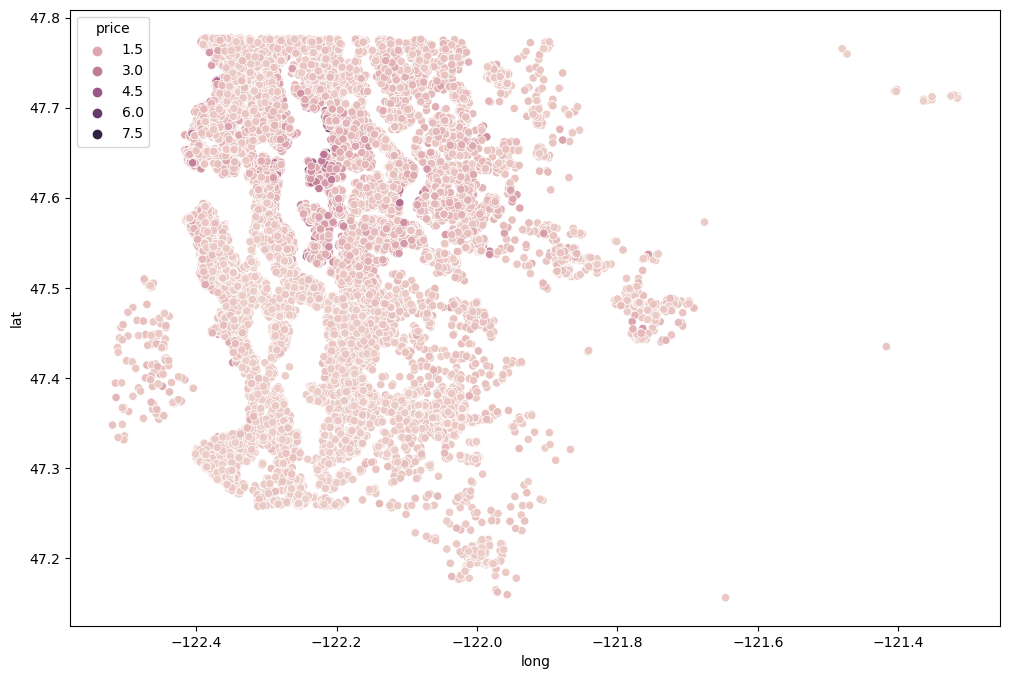

In [598]:
plt.figure(figsize  =(12,8))
sns.scatterplot(x = 'long', y = 'lat', data=df, hue = 'price')

In [599]:
df['price'].corr(np.abs(df['long'] * df['lat']))

0.2655039278512946

In [600]:
df['long*lat'] = np.abs(df['long'] * df['lat'])
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  ...  sqft_basement  zipcode  \
0               0     0          3      7  ...              0    98178   
1               0     0          3      7  ...            400    98125   
2               0     0          3      6  ...              0    98028   
3               0     0          5      7  ...            910    98136   
4               0     0          3      8  ...              0    98074   
...           ...   ...        ...    ...  ...            ...      ...   
21608           0     0          3      8  ...              0    98103   
21609           0     0          3      8  ...              0    98146   
21610           0     0          3      7  ...              0    98144   
21611           0     0          3      8  ...              0    98027   
21612           0     0          3      7  ...              0    98144   

           lat     long  sqft_living15  sqft_lot15  datediff  \
0      47.5112 -122.257           1340        5650      3002   
1      47.7210 -122.319           1690        7639      2945   
2      47.7379 -122.233           2720        8062      2867   
3      47.5208 -122.393           1360        5000      2945   
4      47.6168 -122.045           1800        7503      2874   
...        ...      ...            ...         ...       ...   
21608  47.6993 -122.346           1530        1509      3147   
21609  47.5107 -122.362           1830        7200      2869   
21610  47.5944 -122.299           1020        2007      3114   
21611  47.5345 -122.069           1410        1287      2907   
21612  47.5941 -122.299           1020        1357      3000   

       yrs_since_construction  yrs_since_renovation     long*lat  
0                          68                     0  5808.576778  
1                          72                    32  5837.184999  
2                          90                     0  5835.146731  
3                          58                     0  5816.213274  
4                          36                     0  5811.392356  
...                       ...                   ...          ...  
21608                      14                     0  5835.818558  
21609                       9                     0  5813.504273  
21610                      14                     0  5820.747526  
21611                      19                     0  5802.488881  
21612                      15                     0  5820.710836  

[21613 rows x 21 columns]

In [601]:
dfZipcode = df[['price', 'zipcode']]
dfZipcode

price  zipcode
0      221900.0    98178
1      538000.0    98125
2      180000.0    98028
3      604000.0    98136
4      510000.0    98074
...         ...      ...
21608  360000.0    98103
21609  400000.0    98146
21610  402101.0    98144
21611  400000.0    98027
21612  325000.0    98144

[21613 rows x 2 columns]

In [602]:
dfZipcode['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

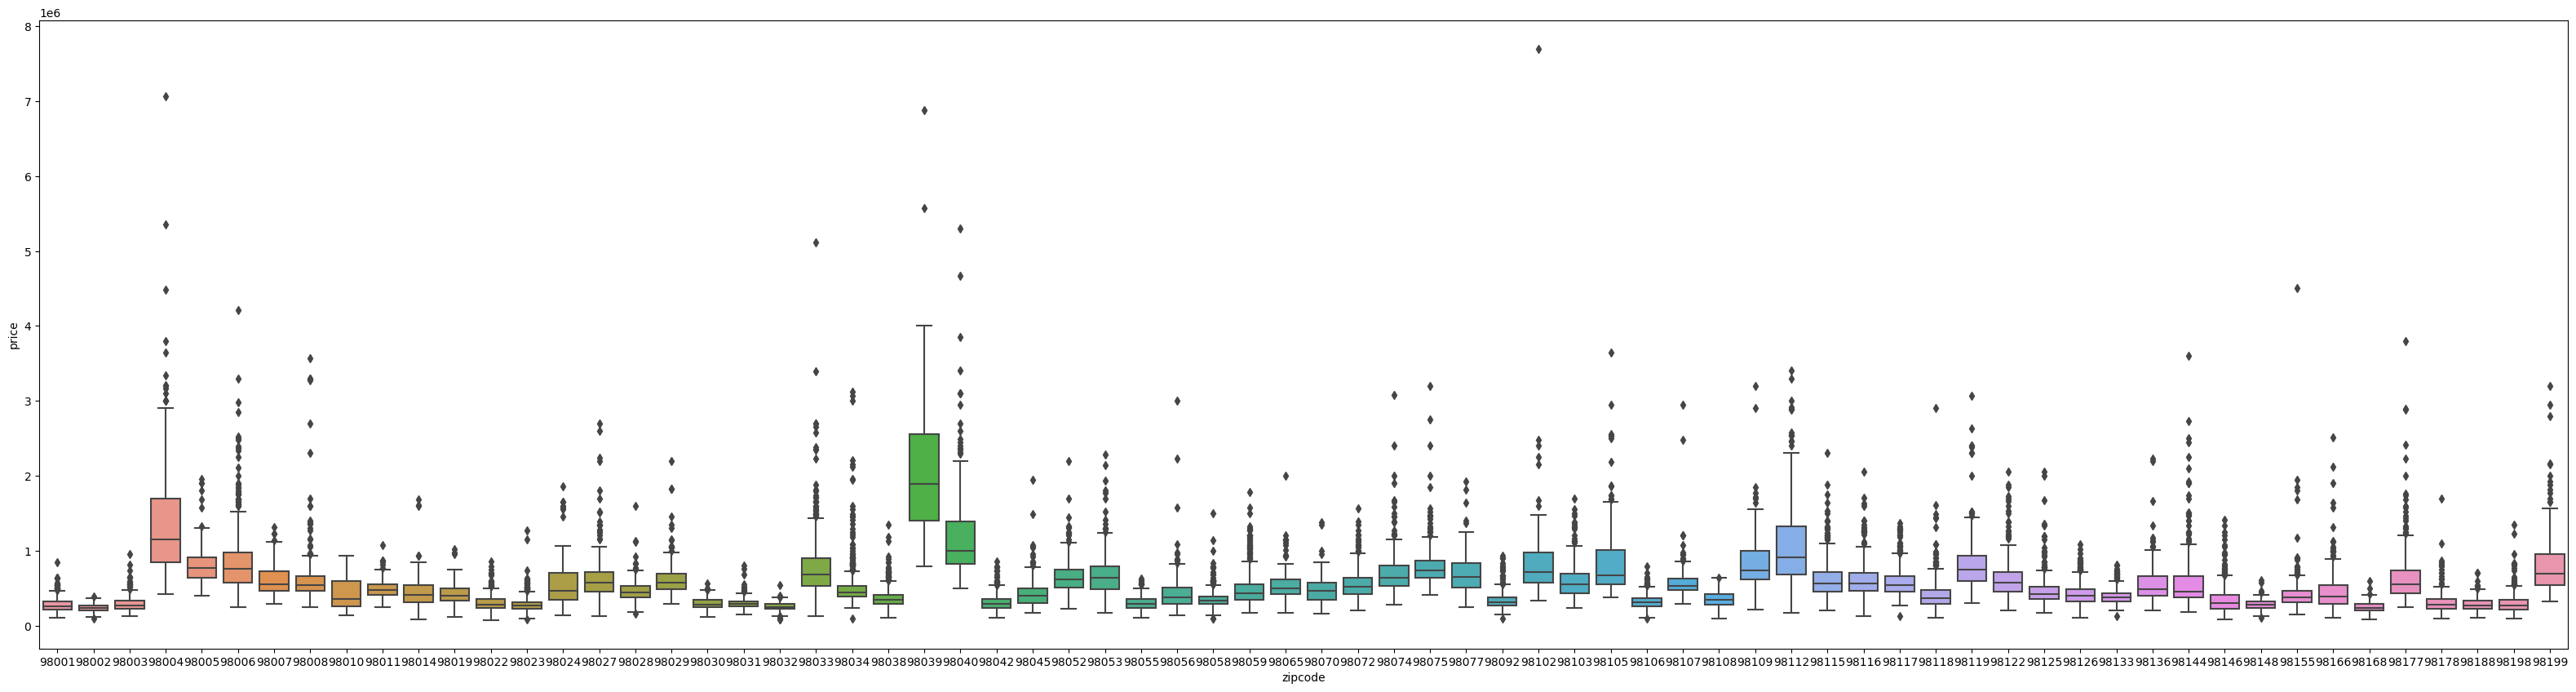

In [603]:
plt.figure(figsize=(40,10))
sb.boxplot(x='zipcode', y='price', data=df)

plt.show()

In [604]:
pd.DataFrame(df.groupby('zipcode')['price'].mean()).sort_values('price', ascending=False).head(5)

price
zipcode              
98039    2.160607e+06
98004    1.355927e+06
98040    1.194230e+06
98112    1.095499e+06
98102    9.012583e+05

In [605]:
df.loc[df["zipcode"] == 98039, "zipcode"] = 4
df.loc[df["zipcode"] == 98004, "zipcode"] = 3
df.loc[df["zipcode"] == 98040, "zipcode"] = 2
df.loc[df["zipcode"] == 98112, "zipcode"] = 1
df.loc[df["zipcode"] > 4, "zipcode"] = 0
df['zipcode'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [606]:
df.corr().style.background_gradient(cmap='coolwarm').format(precision=3)

In [607]:
df['sqft_lot15'].corr(df['sqft_lot'])

0.7185567524330344

In [608]:
df['sqft_living15'].corr(df['sqft_living'])

0.7564202590172211

In [609]:
df.drop(columns = 'datediff', axis='columns', inplace=True)
df.drop(columns = 'sqft_lot', axis='columns', inplace=True)
df.drop(columns = 'sqft_lot15', axis='columns', inplace=True)
df.drop(columns = 'yrs_since_renovation', axis='columns', inplace=True)
df.drop(columns = 'long', axis='columns', inplace=True)

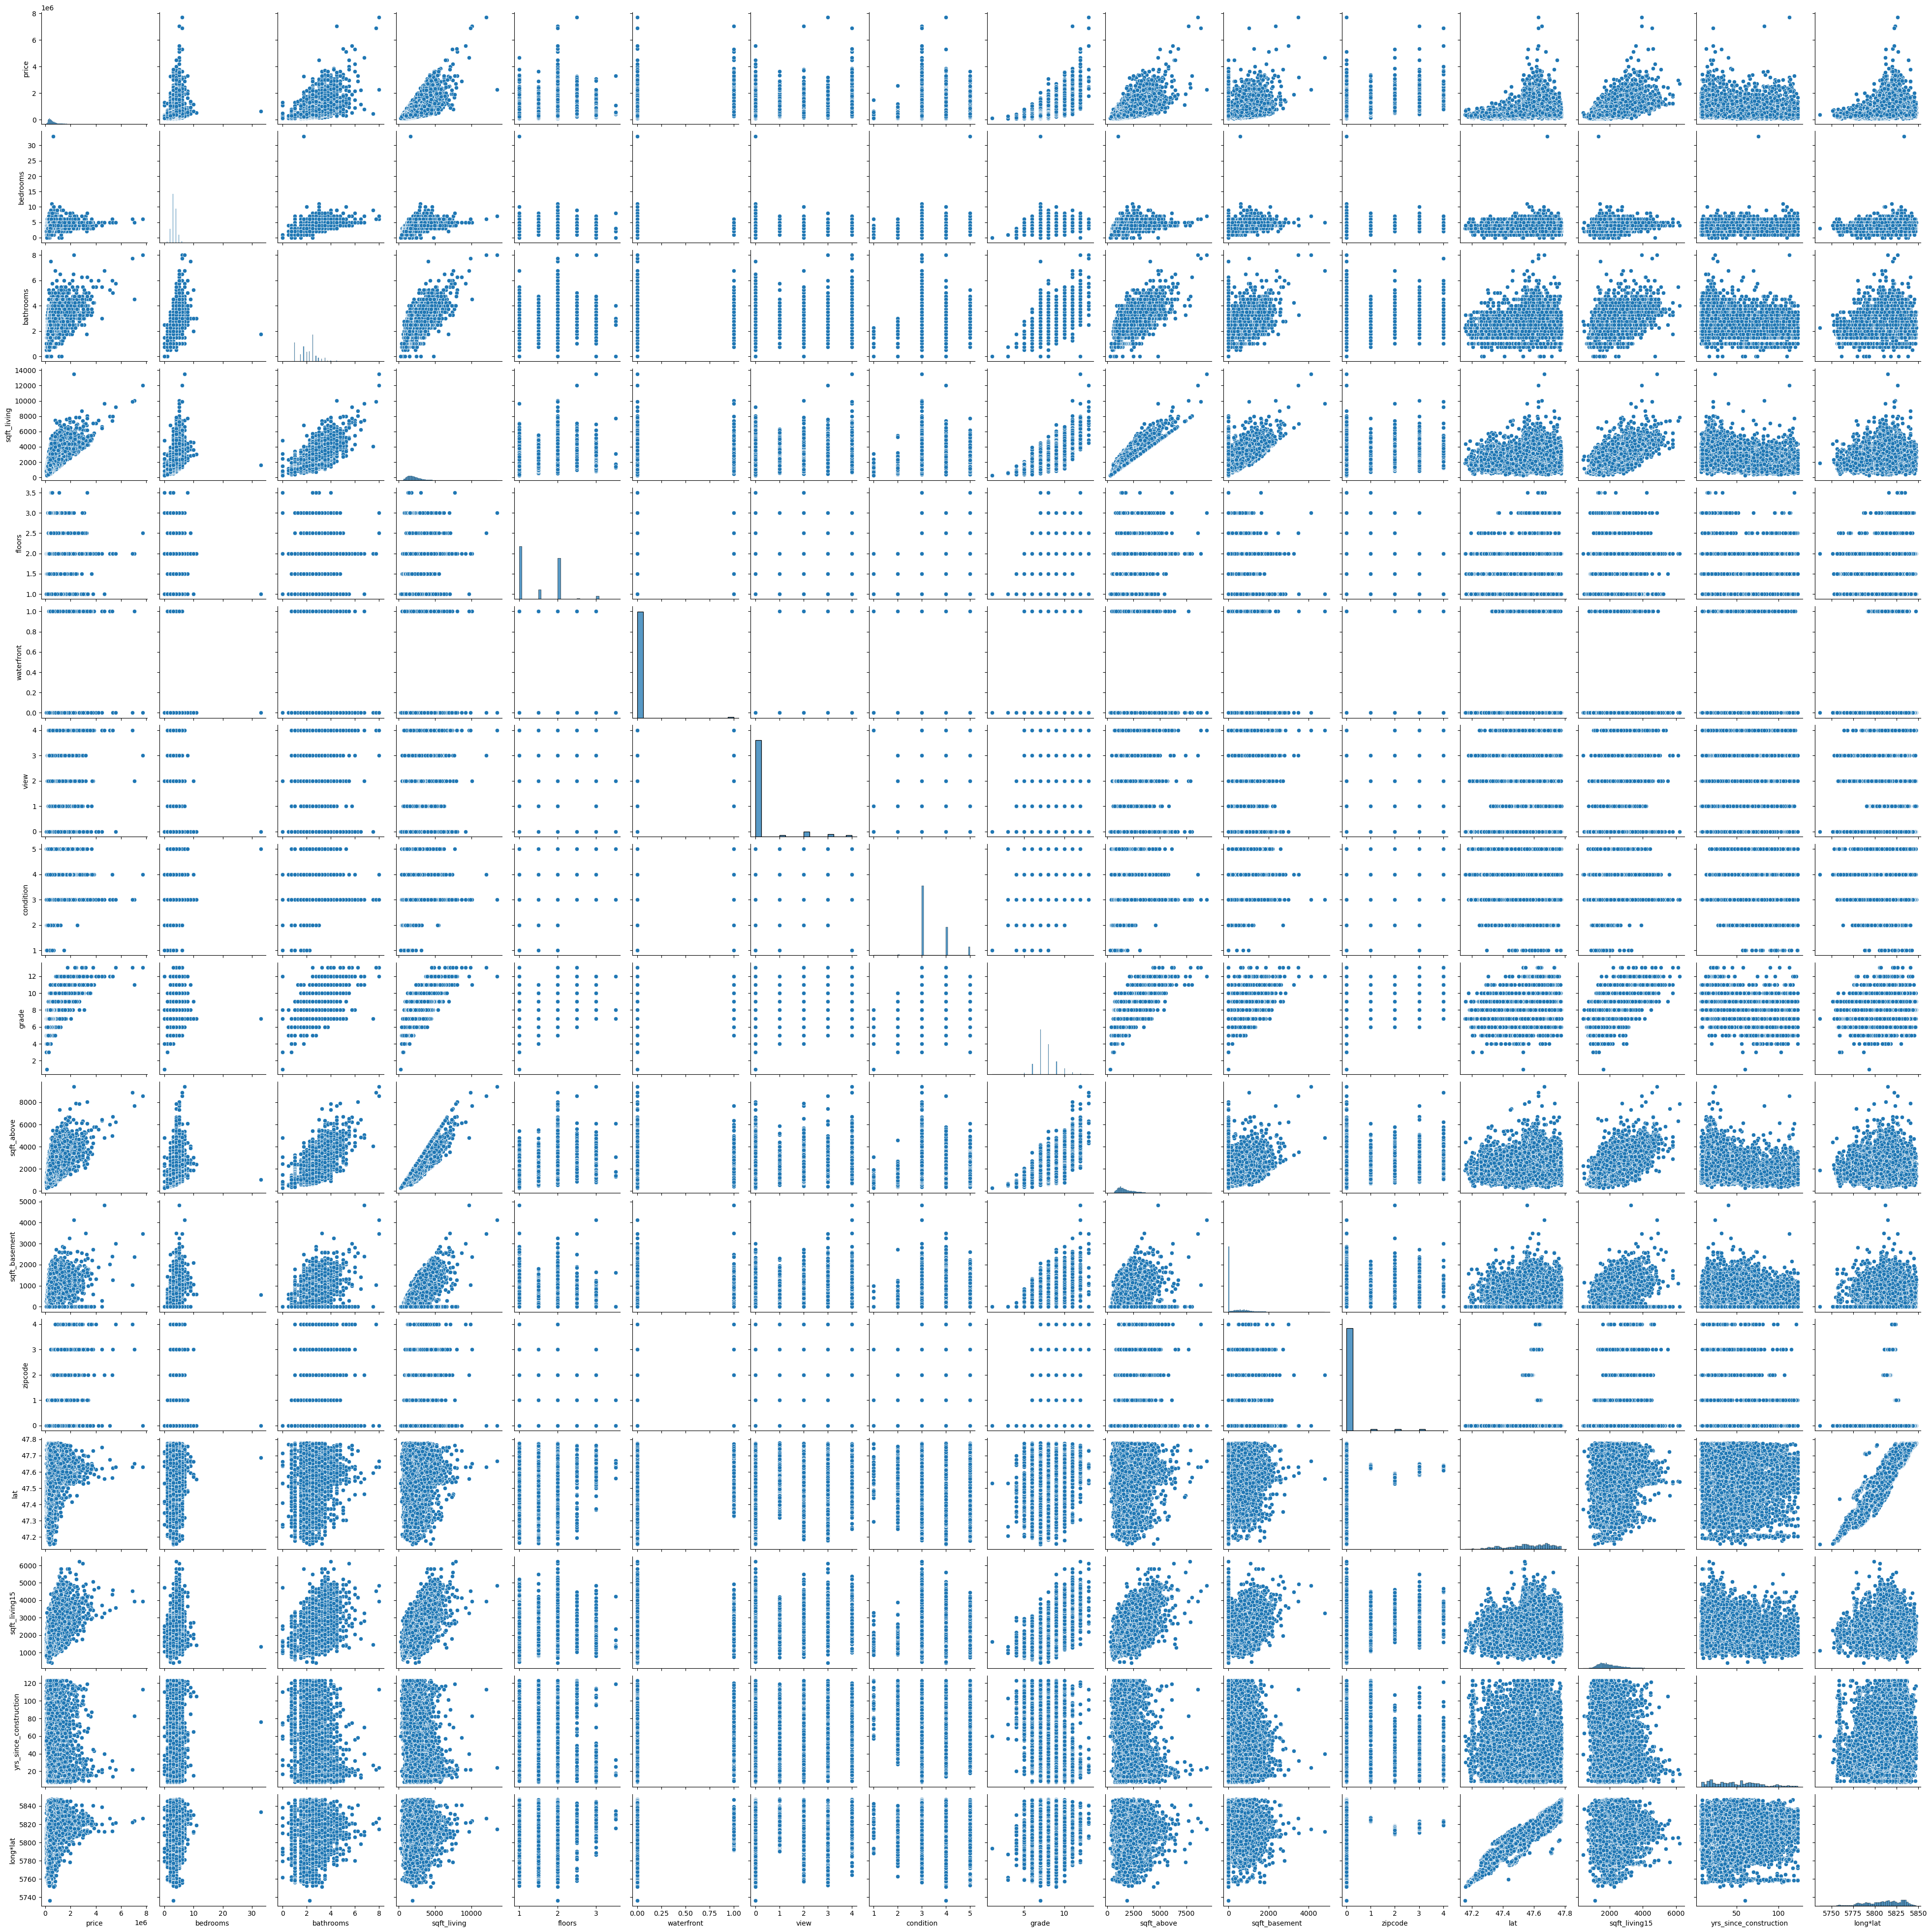

In [610]:
sns.pairplot(df)

In [639]:
X_columns = df.columns.to_list()
X_columns.remove('price')
X = df[X_columns]
y = df['price']
X.shape

(21613, 15)

Score:  0.4853419440384572
Coefficients:  [282.83393926]


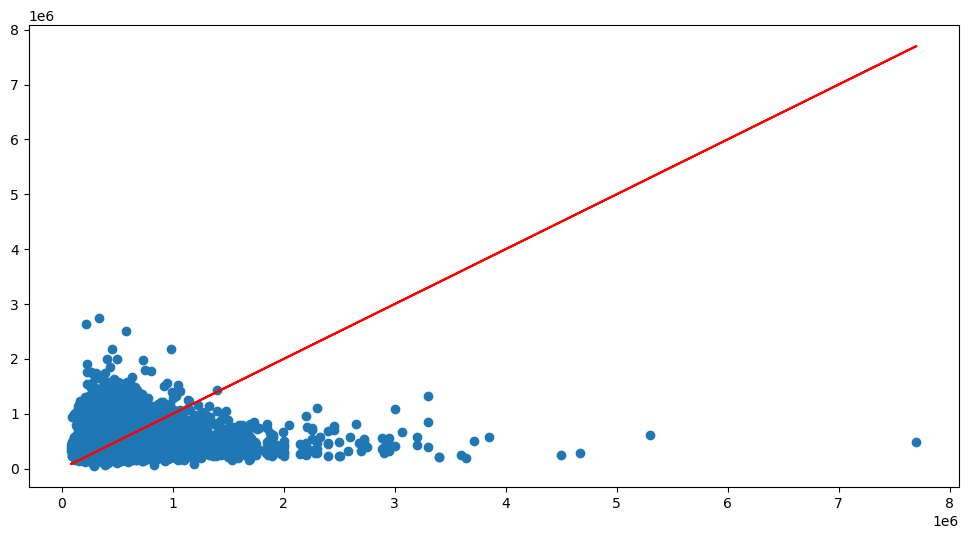

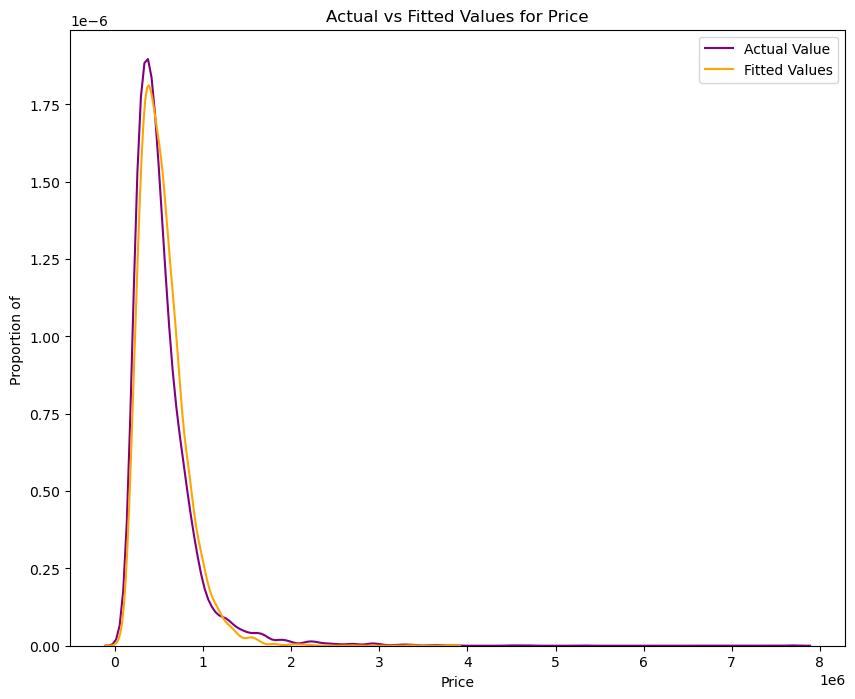

In [640]:
x = df[['sqft_living']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

lr_1dim_model = LinearRegression()
lr_1dim_model.fit(x_train,y_train)
pred = lr_1dim_model.predict(x_test)
print('Score: ', lr_1dim_model.score(x_test,y_test))
print('Coefficients: ', lr_1dim_model.coef_)

plt.figure(figsize = (12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

plt.figure(figsize=(10, 8))
a = sns.kdeplot(y_test, color="purple", label="Actual Value")
sns.kdeplot(pred, color="orange", label="Fitted Values")
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of ')
plt.legend()
plt.show()
plt.close()

Score:  0.7686347996588562
Coefficients:  [-3.29627411e+04  3.89097529e+04  1.08878692e+02  1.32615302e+04
  6.13733122e+05  5.25375581e+04  2.45220075e+04  8.86273767e+04
  7.03500142e+01  3.85286774e+01  2.07037083e+05  3.29559501e+05
  4.77193814e-01  2.28330995e+03  1.77402679e+03]


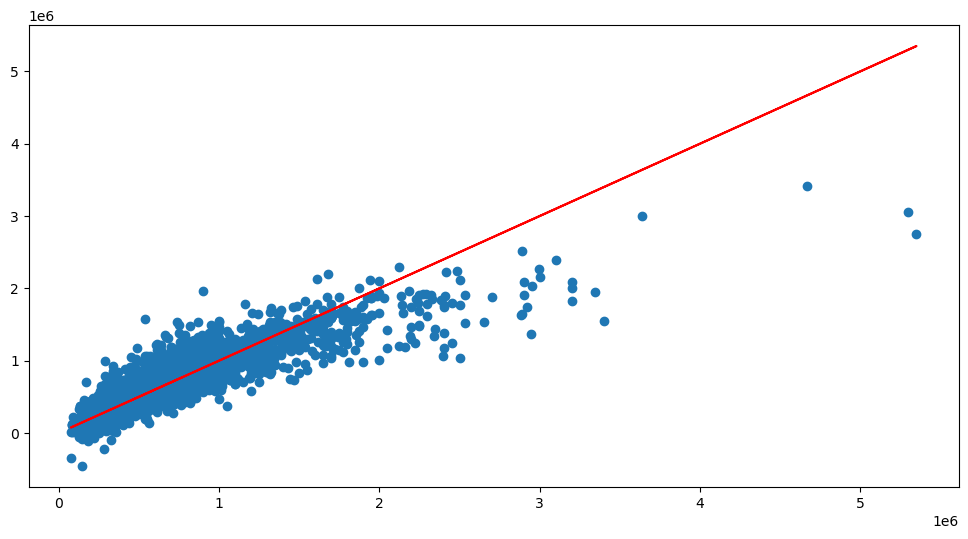

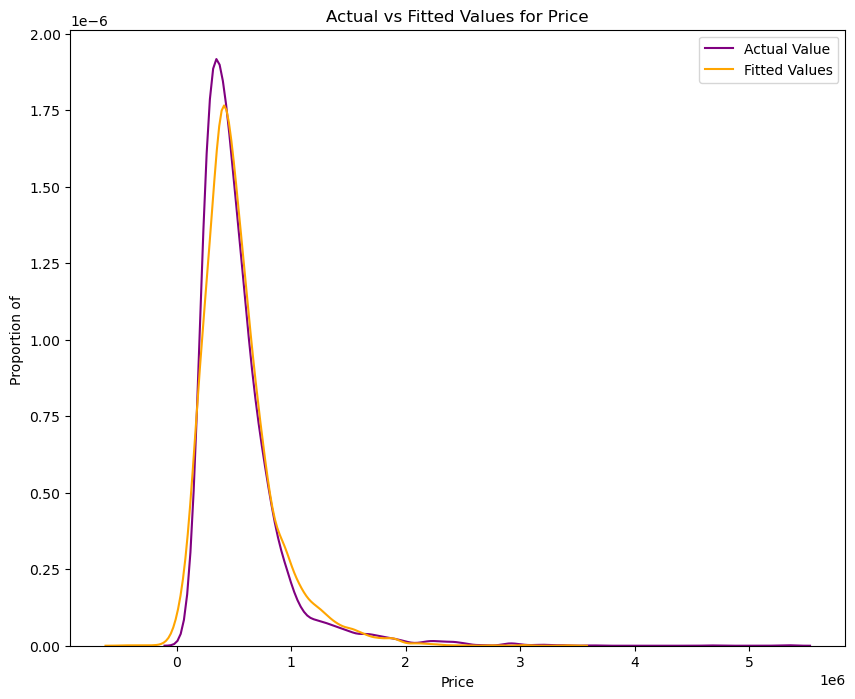

In [641]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

lr_15dim_model = LinearRegression()
lr_15dim_model.fit(x_train,y_train)
pred = lr_15dim_model.predict(x_test)
print('Score: ', lr_15dim_model.score(x_test,y_test))
print('Coefficients: ', lr_15dim_model.coef_)

plt.figure(figsize = (12,6))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r')

plt.figure(figsize=(10, 8))
a = sns.kdeplot(y_test, color="purple", label="Actual Value")
sns.kdeplot(pred, color="orange", label="Fitted Values")
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of ')
plt.legend()
plt.show()
plt.close()

Score:  0.7589701893798657


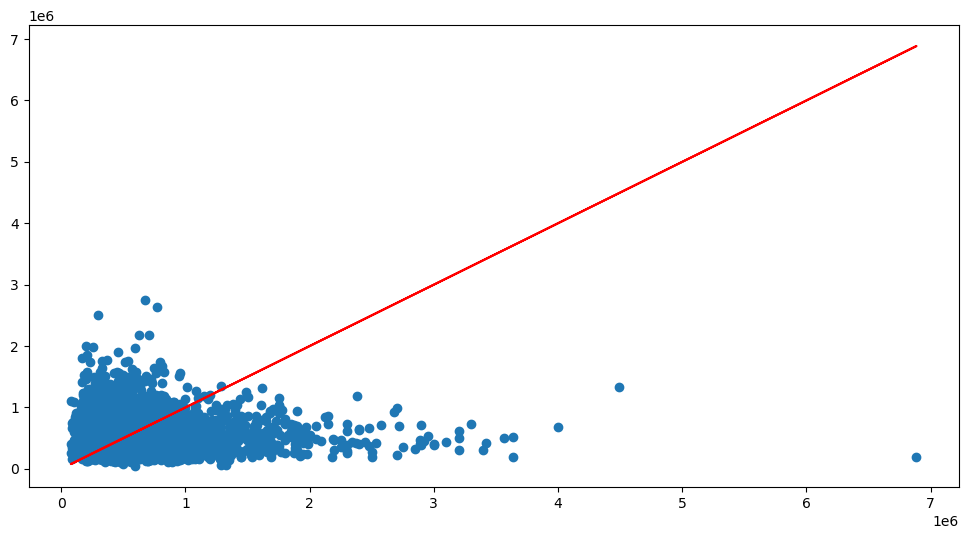

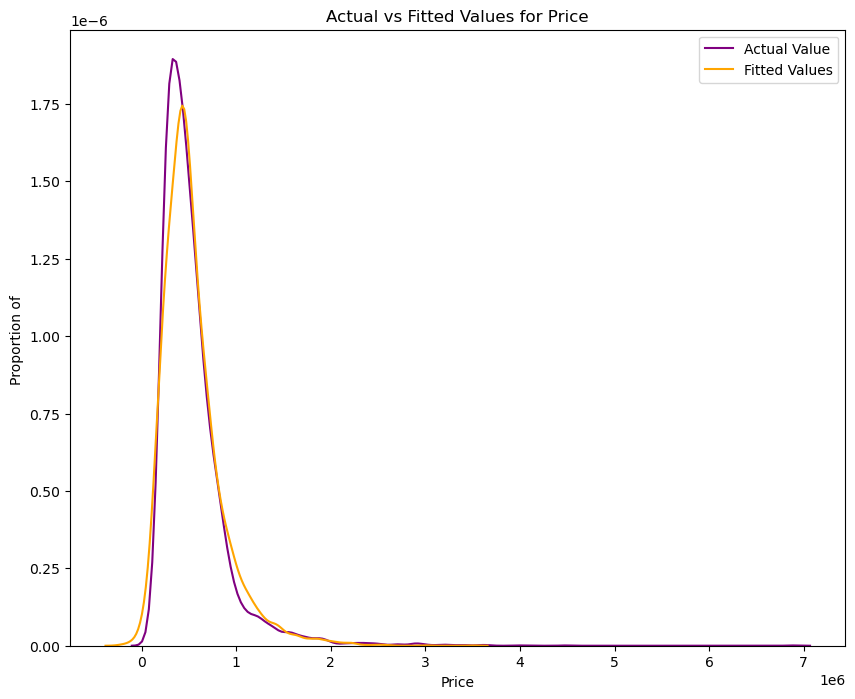

In [644]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scaler = StandardScaler()

function =[('scale',StandardScaler()), ('model',LinearRegression())]
pipe = Pipeline(function)
pipe
pipe.fit(x_train, y_train)
pred = pipe.predict(x_test)

r_square = r2_score(y_test, pred)
print('Score: ', r_square)

plt.figure(figsize = (12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

plt.figure(figsize=(10, 8))
a = sns.kdeplot(y_test, color="purple", label="Actual Value")
sns.kdeplot(pred, color="orange", label="Fitted Values")
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of ')
plt.legend()
plt.show()
plt.close()

In [615]:
kfold = model_selection.StratifiedKFold(n_splits=10)
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=1), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]},
                    cv=kfold,
                    refit=False)
grid.fit(x_train, y_train)
grid.best_params_

C:\Users\wnuka\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


{'polynomialfeatures__degree': 2}

Score:  0.7589817976995524


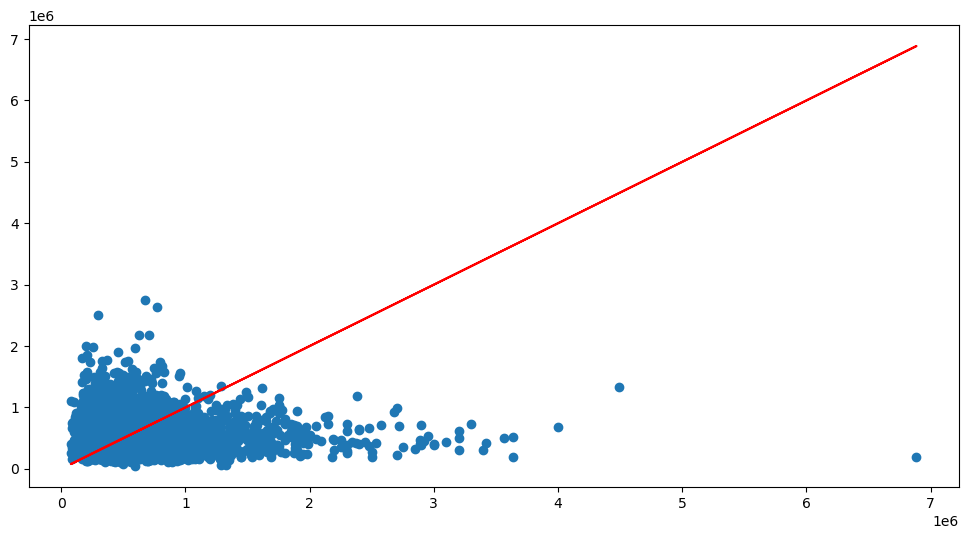

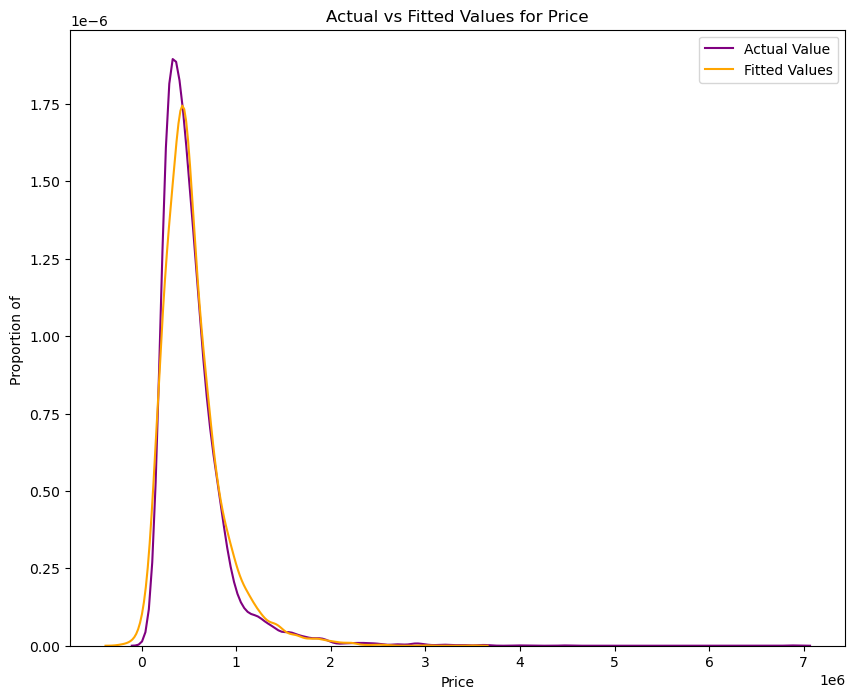

In [645]:
ridge=Ridge(alpha=0.1)
housing_ridge_fit =  ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
r_square_ridge = r2_score(y_test, pred)
print('Score: ', r_square_ridge)

plt.figure(figsize = (12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

plt.figure(figsize=(10, 8))
a = sns.kdeplot(y_test, color="purple", label="Actual Value")
sns.kdeplot(pred, color="orange", label="Fitted Values")
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of ')
plt.legend()
plt.show()
plt.close()

Score:  0.8394500219107429


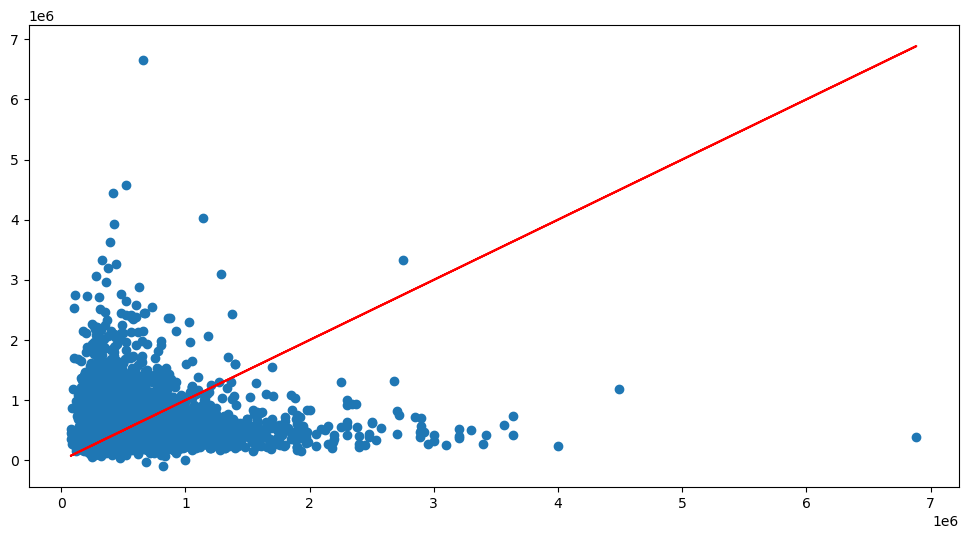

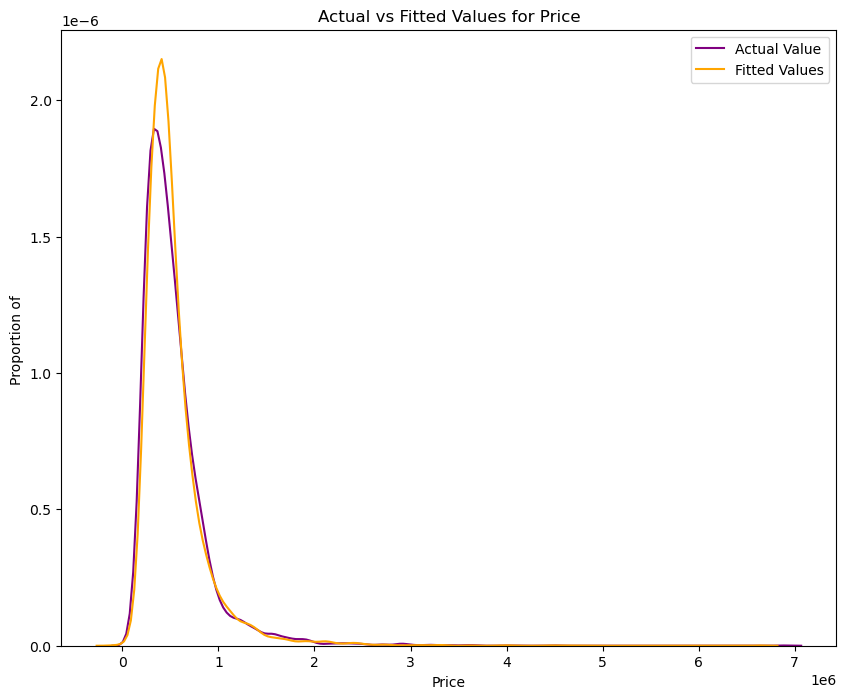

In [646]:
poly = PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

housing_ridge_poly = ridge.fit(x_train_poly, y_train)
pred = ridge.predict(x_test_poly)
housing_rid_pol_mse = mean_squared_error(y_test, pred)
housing_rid_pol_mse
r_square_ridge_pol = r2_score(y_test, pred)
r_square_ridge_pol
print('Score: ', r_square_ridge_pol)

plt.figure(figsize = (12,6))
plt.scatter(y_test,housing_rid_pol_pred)
plt.plot(y_test,y_test,'r')

plt.figure(figsize=(10, 8))
a = sns.kdeplot(y_test, color="purple", label="Actual Value")
sns.kdeplot(housing_rid_pol_pred, color="orange", label="Fitted Values")
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of ')
plt.legend()
plt.show()
plt.close()

In [664]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, test_size=0.25)

In [665]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [666]:
y_size,x_size = X_train.shape

In [667]:
model = Sequential()
model.add(Dense(x_size,activation='relu'))
model.add(Dense(x_size,activation='relu'))
model.add(Dense(x_size,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mae')
history = model.fit(
    x= X_train,
    y= y_train,
    batch_size=128,
    epochs=400,
    validation_data=(X_valid, y_valid))

Epoch 1/400
95/95 [==============================] - 1s 3ms/step - loss: 539249.0000 - val_loss: 544468.1250
Epoch 2/400
95/95 [==============================] - 0s 2ms/step - loss: 539222.1250 - val_loss: 544398.1875
Epoch 3/400
95/95 [==============================] - 0s 2ms/step - loss: 539032.2500 - val_loss: 544024.7500
Epoch 4/400
95/95 [==============================] - 0s 2ms/step - loss: 538334.7500 - val_loss: 542896.9375
Epoch 5/400
95/95 [==============================] - 0s 2ms/step - loss: 536576.3125 - val_loss: 540362.3750
Epoch 6/400
95/95 [==============================] - 0s 2ms/step - loss: 533042.8125 - val_loss: 535650.6875
Epoch 7/400
95/95 [==============================] - 0s 2ms/step - loss: 526916.0000 - val_loss: 527886.6875
Epoch 8/400
95/95 [==============================] - 0s 2ms/step - loss: 517285.5000 - val_loss: 516128.8750
Epoch 9/400
95/95 [==============================] - 0s 2ms/step - loss: 503176.6250 - val_loss: 499354.7500
Epoch 10/400
95/95 

95/95 [==============================] - 0s 2ms/step - loss: 138735.3125 - val_loss: 140372.3281
Epoch 76/400
95/95 [==============================] - 0s 2ms/step - loss: 138052.5469 - val_loss: 139629.5781
Epoch 77/400
95/95 [==============================] - 0s 2ms/step - loss: 137361.3906 - val_loss: 138888.5000
Epoch 78/400
95/95 [==============================] - 0s 2ms/step - loss: 136696.8125 - val_loss: 138172.2500
Epoch 79/400
95/95 [==============================] - 0s 2ms/step - loss: 136062.4844 - val_loss: 137442.1094
Epoch 80/400
95/95 [==============================] - 0s 2ms/step - loss: 135412.2656 - val_loss: 136770.4688
Epoch 81/400
95/95 [==============================] - 0s 2ms/step - loss: 134799.2969 - val_loss: 136077.6562
Epoch 82/400
95/95 [==============================] - 0s 2ms/step - loss: 134230.7500 - val_loss: 135430.9531
Epoch 83/400
95/95 [==============================] - 0s 2ms/step - loss: 133621.9219 - val_loss: 134785.5781
Epoch 84/400
95/95 [===

95/95 [==============================] - 0s 2ms/step - loss: 117861.6250 - val_loss: 117981.8125
Epoch 150/400
95/95 [==============================] - 0s 2ms/step - loss: 117813.4922 - val_loss: 117930.5000
Epoch 151/400
95/95 [==============================] - 0s 2ms/step - loss: 117700.1094 - val_loss: 117868.1953
Epoch 152/400
95/95 [==============================] - 0s 2ms/step - loss: 117621.2734 - val_loss: 117767.5078
Epoch 153/400
95/95 [==============================] - 0s 2ms/step - loss: 117586.3438 - val_loss: 117697.9453
Epoch 154/400
95/95 [==============================] - 0s 2ms/step - loss: 117493.8203 - val_loss: 117631.4766
Epoch 155/400
95/95 [==============================] - 0s 2ms/step - loss: 117427.5078 - val_loss: 117589.5234
Epoch 156/400
95/95 [==============================] - 0s 2ms/step - loss: 117349.3594 - val_loss: 117517.6484
Epoch 157/400
95/95 [==============================] - 0s 2ms/step - loss: 117283.3203 - val_loss: 117451.0312
Epoch 158/400
9

Epoch 223/400
95/95 [==============================] - 0s 2ms/step - loss: 114328.8594 - val_loss: 114855.8672
Epoch 224/400
95/95 [==============================] - 0s 2ms/step - loss: 114278.7578 - val_loss: 114835.2500
Epoch 225/400
95/95 [==============================] - 0s 2ms/step - loss: 114260.2344 - val_loss: 114794.3047
Epoch 226/400
95/95 [==============================] - 0s 2ms/step - loss: 114245.1406 - val_loss: 114762.3828
Epoch 227/400
95/95 [==============================] - 0s 2ms/step - loss: 114224.9297 - val_loss: 114728.8750
Epoch 228/400
95/95 [==============================] - 0s 2ms/step - loss: 114169.2109 - val_loss: 114708.0703
Epoch 229/400
95/95 [==============================] - 0s 2ms/step - loss: 114144.2422 - val_loss: 114675.4219
Epoch 230/400
95/95 [==============================] - 0s 2ms/step - loss: 114111.1250 - val_loss: 114641.5000
Epoch 231/400
95/95 [==============================] - 0s 2ms/step - loss: 114101.7031 - val_loss: 114610.7109
E

Epoch 297/400
95/95 [==============================] - 0s 2ms/step - loss: 112482.2344 - val_loss: 112994.3906
Epoch 298/400
95/95 [==============================] - 0s 2ms/step - loss: 112458.5703 - val_loss: 112954.1719
Epoch 299/400
95/95 [==============================] - 0s 2ms/step - loss: 112442.0625 - val_loss: 112938.1406
Epoch 300/400
95/95 [==============================] - 0s 2ms/step - loss: 112412.5391 - val_loss: 112916.1328
Epoch 301/400
95/95 [==============================] - 0s 2ms/step - loss: 112414.8516 - val_loss: 112902.1719
Epoch 302/400
95/95 [==============================] - 0s 2ms/step - loss: 112394.3516 - val_loss: 112873.6172
Epoch 303/400
95/95 [==============================] - 0s 2ms/step - loss: 112361.6172 - val_loss: 112852.0703
Epoch 304/400
95/95 [==============================] - 0s 2ms/step - loss: 112341.7734 - val_loss: 112834.3047
Epoch 305/400
95/95 [==============================] - 0s 2ms/step - loss: 112314.3359 - val_loss: 112812.5078
E

Epoch 371/400
95/95 [==============================] - 0s 2ms/step - loss: 110567.7109 - val_loss: 110934.6328
Epoch 372/400
95/95 [==============================] - 0s 2ms/step - loss: 110486.4375 - val_loss: 110902.9766
Epoch 373/400
95/95 [==============================] - 0s 2ms/step - loss: 110455.9062 - val_loss: 110902.9922
Epoch 374/400
95/95 [==============================] - 0s 2ms/step - loss: 110443.3203 - val_loss: 110822.1172
Epoch 375/400
95/95 [==============================] - 0s 2ms/step - loss: 110408.1328 - val_loss: 110799.8906
Epoch 376/400
95/95 [==============================] - 0s 2ms/step - loss: 110365.3672 - val_loss: 110751.7812
Epoch 377/400
95/95 [==============================] - 0s 2ms/step - loss: 110343.4141 - val_loss: 110736.7500
Epoch 378/400
95/95 [==============================] - 0s 2ms/step - loss: 110355.7031 - val_loss: 110694.7969
Epoch 379/400
95/95 [==============================] - 0s 2ms/step - loss: 110335.6953 - val_loss: 110672.1172
E

In [668]:
predictions=model.predict(X_test)

169/169 [==============================] - 0s 885us/step


In [669]:
print("The absolute mean error :",mean_absolute_error(y_test, predictions))

The absolute mean error : 105265.04000328171


In [670]:
sklearn.metrics.r2_score(y_test,predictions)

0.7623143193894454

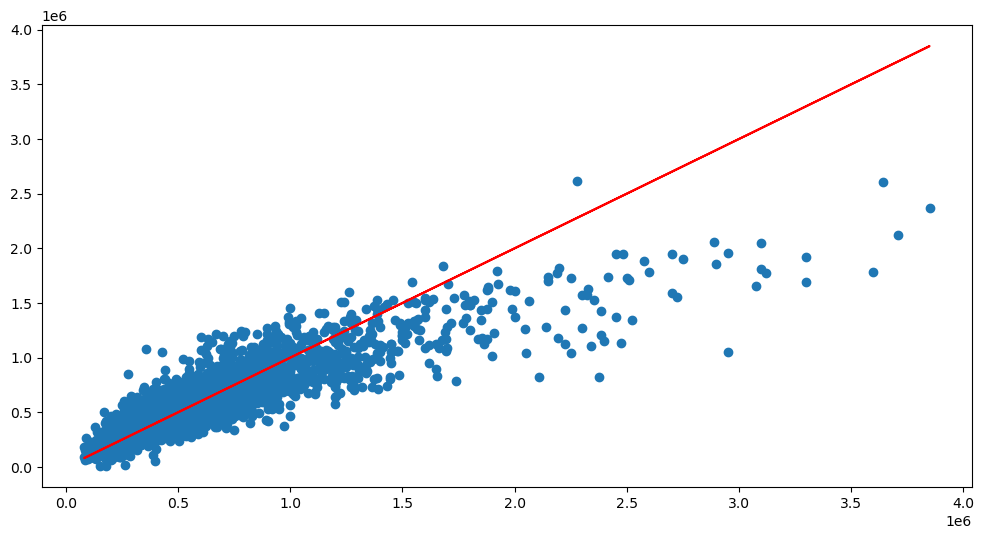

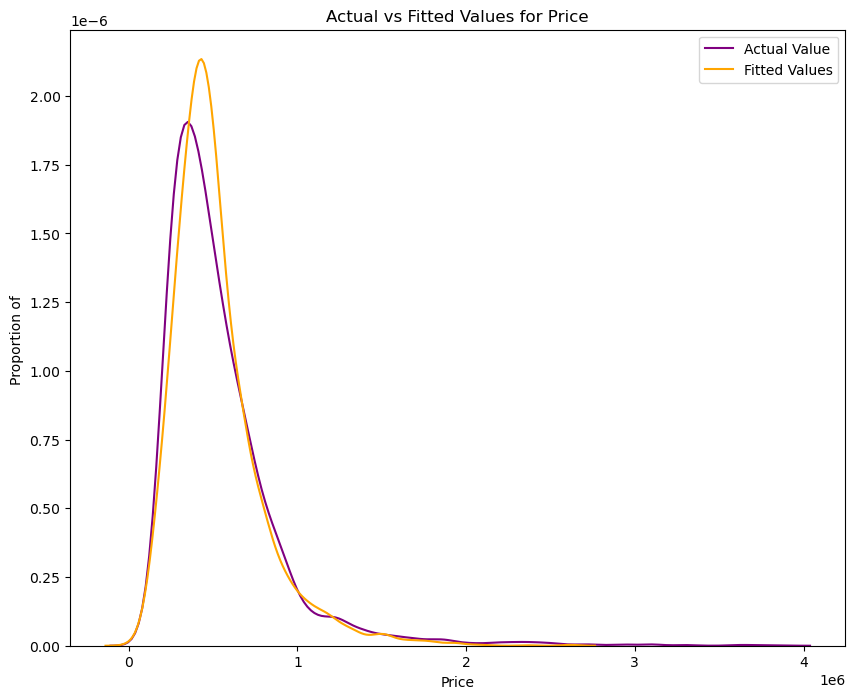

<AxesSubplot:>

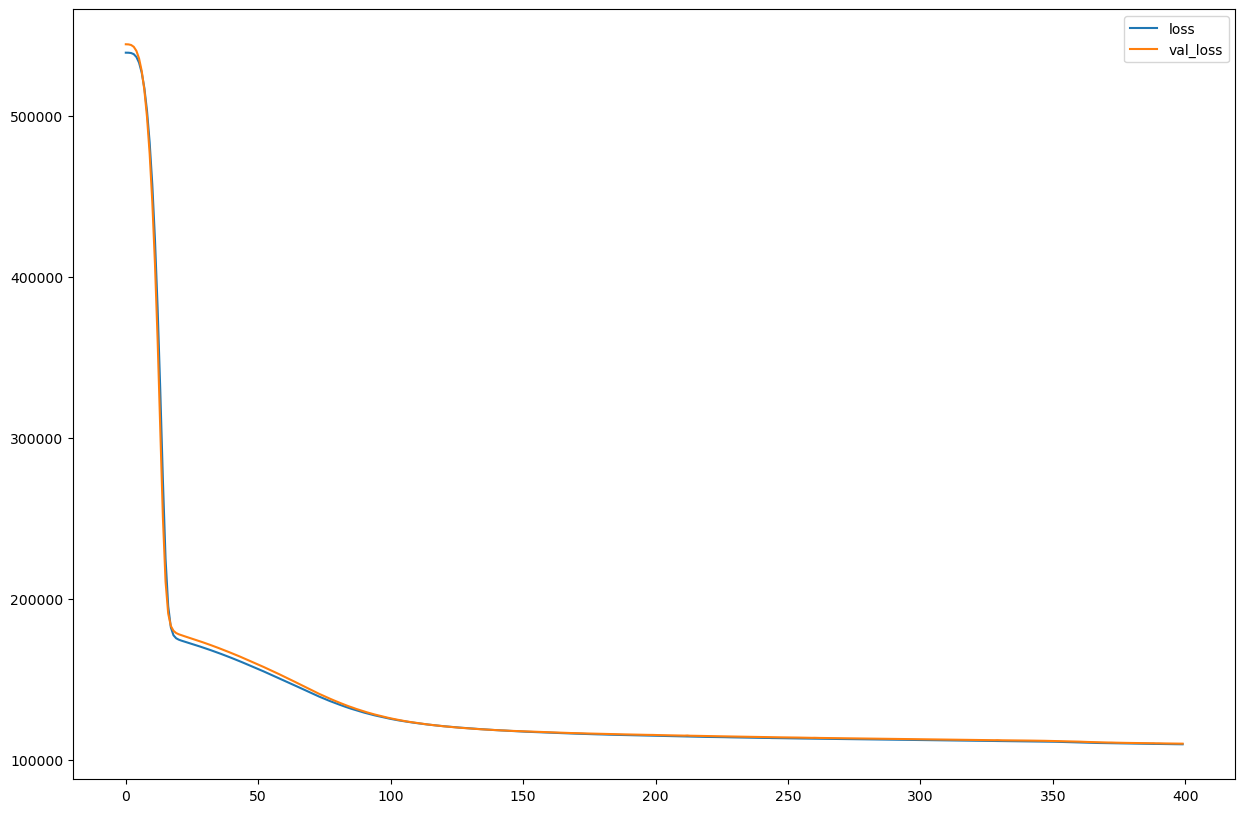

In [671]:
plt.figure(figsize = (12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

plt.figure(figsize=(10, 8))
a = sns.kdeplot(y_test, color="purple", label="Actual Value")
sns.kdeplot(predictions[:,0], color="orange", label="Fitted Values")
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of ')
plt.legend()
plt.show()
plt.close()

pd.DataFrame(history.history).plot(figsize=(15,10))

In [672]:
model = Sequential()
model.add(Dense(x_size,activation='relu'))
model.add(Dense(x_size,activation='relu'))
model.add(Dense(x_size,activation='relu'))
model.add(Dense(1))
opt = Adam(learning_rate = 0.1)
model.compile(optimizer = opt, loss = 'mae')
history = model.fit(
    x= X_train,
    y= y_train,
    batch_size=128,
    epochs=400,
    validation_data=(X_valid, y_valid))

Epoch 1/400
95/95 [==============================] - 1s 3ms/step - loss: 315443.6875 - val_loss: 164849.5938
Epoch 2/400
95/95 [==============================] - 0s 2ms/step - loss: 147518.8438 - val_loss: 135278.7500
Epoch 3/400
95/95 [==============================] - 0s 2ms/step - loss: 127612.5391 - val_loss: 122845.4844
Epoch 4/400
95/95 [==============================] - 0s 2ms/step - loss: 120719.5312 - val_loss: 117690.4531
Epoch 5/400
95/95 [==============================] - 0s 2ms/step - loss: 116837.6016 - val_loss: 115953.6875
Epoch 6/400
95/95 [==============================] - 0s 2ms/step - loss: 115230.1641 - val_loss: 115013.0078
Epoch 7/400
95/95 [==============================] - 0s 2ms/step - loss: 114356.8047 - val_loss: 113814.7656
Epoch 8/400
95/95 [==============================] - 0s 2ms/step - loss: 113735.6016 - val_loss: 112530.5391
Epoch 9/400
95/95 [==============================] - 0s 2ms/step - loss: 112920.9219 - val_loss: 112081.8203
Epoch 10/400
95/95 

95/95 [==============================] - 0s 2ms/step - loss: 102397.3125 - val_loss: 103326.8203
Epoch 76/400
95/95 [==============================] - 0s 2ms/step - loss: 102847.5234 - val_loss: 104025.3906
Epoch 77/400
95/95 [==============================] - 0s 2ms/step - loss: 102757.3359 - val_loss: 102276.0312
Epoch 78/400
95/95 [==============================] - 0s 2ms/step - loss: 102479.9609 - val_loss: 102667.4375
Epoch 79/400
95/95 [==============================] - 0s 2ms/step - loss: 102497.3281 - val_loss: 101140.8438
Epoch 80/400
95/95 [==============================] - 0s 2ms/step - loss: 102389.6406 - val_loss: 101105.7109
Epoch 81/400
95/95 [==============================] - 0s 2ms/step - loss: 102119.3281 - val_loss: 101547.2344
Epoch 82/400
95/95 [==============================] - 0s 2ms/step - loss: 103067.8438 - val_loss: 102929.5859
Epoch 83/400
95/95 [==============================] - 0s 2ms/step - loss: 102340.5625 - val_loss: 101915.5781
Epoch 84/400
95/95 [===

95/95 [==============================] - 0s 2ms/step - loss: 102286.9844 - val_loss: 102908.6406
Epoch 150/400
95/95 [==============================] - 0s 2ms/step - loss: 101523.4453 - val_loss: 102178.3750
Epoch 151/400
95/95 [==============================] - 0s 2ms/step - loss: 102233.7422 - val_loss: 107914.2969
Epoch 152/400
95/95 [==============================] - 0s 2ms/step - loss: 102301.2734 - val_loss: 101444.7500
Epoch 153/400
95/95 [==============================] - 0s 2ms/step - loss: 101946.9375 - val_loss: 102097.5156
Epoch 154/400
95/95 [==============================] - 0s 2ms/step - loss: 102196.3047 - val_loss: 100999.3750
Epoch 155/400
95/95 [==============================] - 0s 2ms/step - loss: 101841.8906 - val_loss: 101774.3438
Epoch 156/400
95/95 [==============================] - 0s 2ms/step - loss: 102080.7344 - val_loss: 104631.6953
Epoch 157/400
95/95 [==============================] - 0s 2ms/step - loss: 102167.9844 - val_loss: 102496.1406
Epoch 158/400
9

Epoch 223/400
95/95 [==============================] - 0s 2ms/step - loss: 101989.5156 - val_loss: 104910.8359
Epoch 224/400
95/95 [==============================] - 0s 2ms/step - loss: 102275.0000 - val_loss: 101395.6250
Epoch 225/400
95/95 [==============================] - 0s 2ms/step - loss: 103472.4062 - val_loss: 101339.8672
Epoch 226/400
95/95 [==============================] - 0s 2ms/step - loss: 101847.3672 - val_loss: 101807.4297
Epoch 227/400
95/95 [==============================] - 0s 2ms/step - loss: 102299.2422 - val_loss: 101816.2422
Epoch 228/400
95/95 [==============================] - 0s 2ms/step - loss: 102406.5391 - val_loss: 101075.2500
Epoch 229/400
95/95 [==============================] - 0s 2ms/step - loss: 101916.6406 - val_loss: 102007.2812
Epoch 230/400
95/95 [==============================] - 0s 2ms/step - loss: 102211.4531 - val_loss: 101576.1406
Epoch 231/400
95/95 [==============================] - 0s 2ms/step - loss: 102247.7812 - val_loss: 100934.8516
E

Epoch 297/400
95/95 [==============================] - 0s 2ms/step - loss: 101869.7422 - val_loss: 101082.7656
Epoch 298/400
95/95 [==============================] - 0s 2ms/step - loss: 101273.4609 - val_loss: 100178.8047
Epoch 299/400
95/95 [==============================] - 0s 2ms/step - loss: 101927.1406 - val_loss: 100772.5312
Epoch 300/400
95/95 [==============================] - 0s 2ms/step - loss: 100862.0938 - val_loss: 102446.7422
Epoch 301/400
95/95 [==============================] - 0s 2ms/step - loss: 100416.7500 - val_loss: 101351.0469
Epoch 302/400
95/95 [==============================] - 0s 2ms/step - loss: 101440.7891 - val_loss: 100309.1016
Epoch 303/400
95/95 [==============================] - 0s 2ms/step - loss: 100595.1875 - val_loss: 99804.0625
Epoch 304/400
95/95 [==============================] - 0s 2ms/step - loss: 100641.2344 - val_loss: 100004.1328
Epoch 305/400
95/95 [==============================] - 0s 2ms/step - loss: 100983.4375 - val_loss: 99949.6172
Epo

Epoch 372/400
95/95 [==============================] - 0s 2ms/step - loss: 97361.2266 - val_loss: 96134.7031
Epoch 373/400
95/95 [==============================] - 0s 2ms/step - loss: 97200.9297 - val_loss: 97221.1484
Epoch 374/400
95/95 [==============================] - 0s 2ms/step - loss: 98102.3438 - val_loss: 95828.4297
Epoch 375/400
95/95 [==============================] - 0s 2ms/step - loss: 97088.1719 - val_loss: 97256.7344
Epoch 376/400
95/95 [==============================] - 0s 2ms/step - loss: 97244.7656 - val_loss: 96242.1484
Epoch 377/400
95/95 [==============================] - 0s 2ms/step - loss: 97049.5156 - val_loss: 96326.0859
Epoch 378/400
95/95 [==============================] - 0s 2ms/step - loss: 97635.4453 - val_loss: 96775.2500
Epoch 379/400
95/95 [==============================] - 0s 2ms/step - loss: 97323.1172 - val_loss: 98142.8984
Epoch 380/400
95/95 [==============================] - 0s 2ms/step - loss: 97199.4141 - val_loss: 96644.7656
Epoch 381/400
95/95

In [673]:
predictions=model.predict(X_test)

169/169 [==============================] - 0s 886us/step


In [674]:
print("The absolute mean error :",mean_absolute_error(y_test, predictions))

The absolute mean error : 93658.40686803179


In [675]:
sklearn.metrics.r2_score(y_test,predictions)

0.8209321168314794

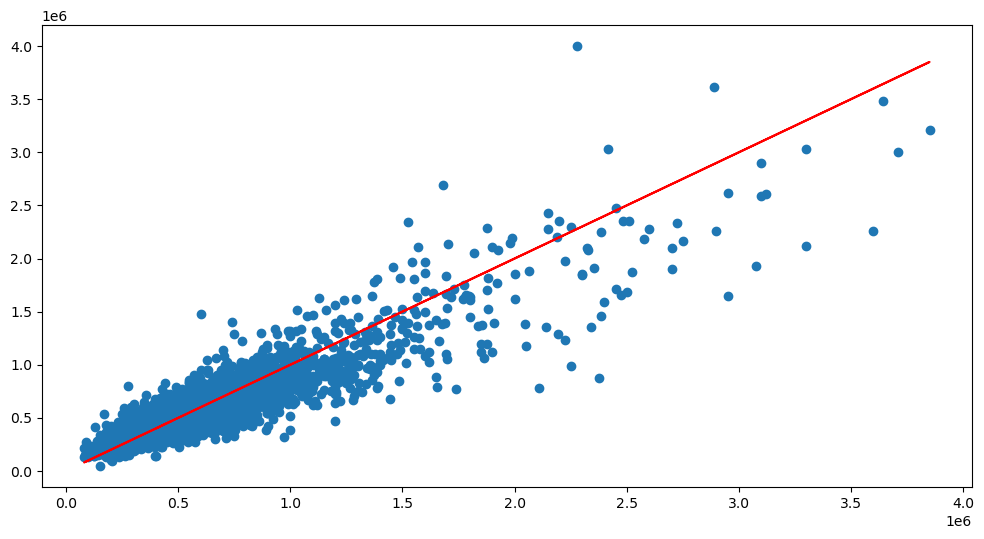

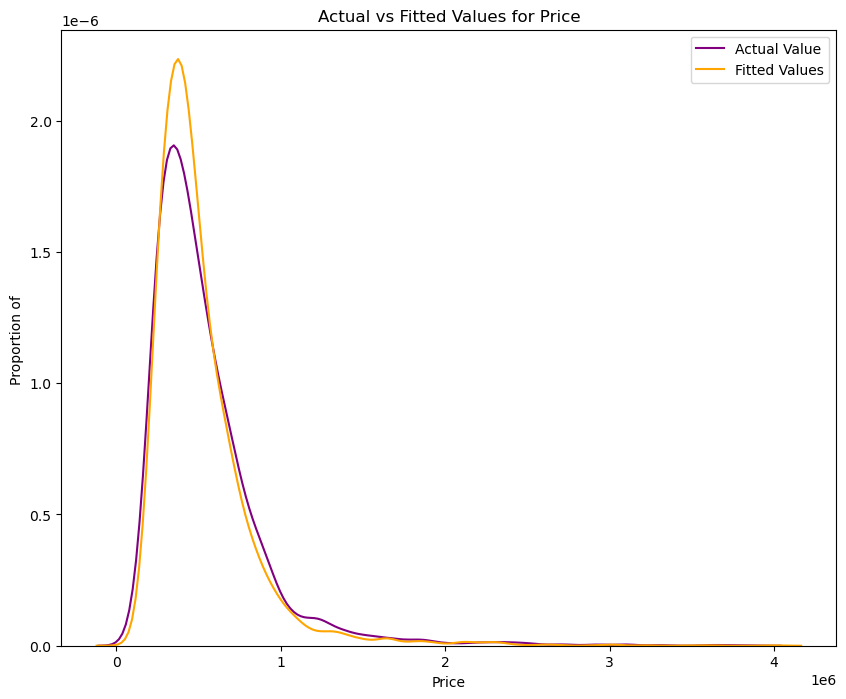

<AxesSubplot:>

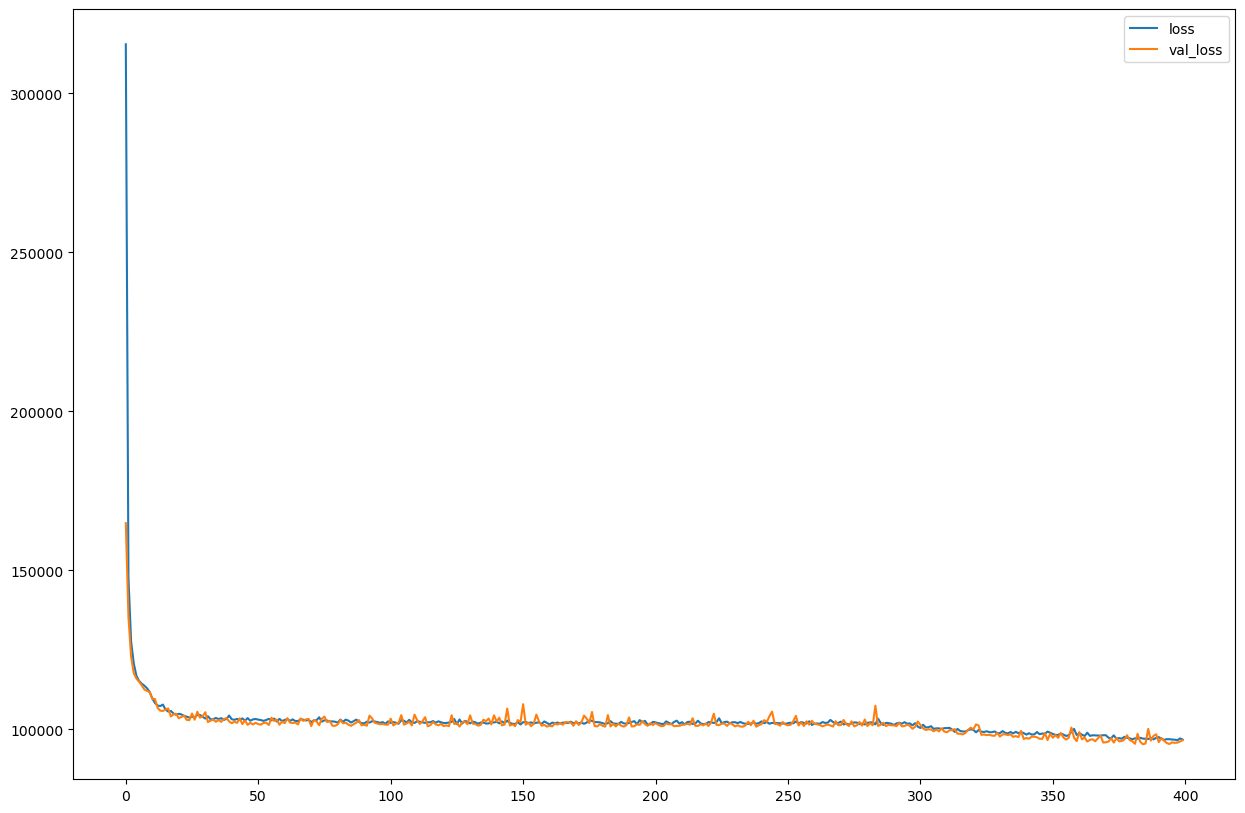

In [676]:
plt.figure(figsize = (12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

plt.figure(figsize=(10, 8))
a = sns.kdeplot(y_test, color="purple", label="Actual Value")
sns.kdeplot(predictions[:,0], color="orange", label="Fitted Values")
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of ')
plt.legend()
plt.show()
plt.close()

pd.DataFrame(history.history).plot(figsize=(15,10))

In [677]:
model = Sequential()
model.add(Dense(x_size,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(x_size,activation='relu'))
model.add(Dense(1))

In [678]:
model.compile(optimizer='adam',loss='mae')

In [679]:
history = model.fit(
    x= X_train,
    y= y_train,
    batch_size=128,
    epochs=400,
    validation_data=(X_valid, y_valid))

Epoch 1/400
95/95 [==============================] - 1s 5ms/step - loss: 533809.9375 - val_loss: 484993.1562
Epoch 2/400
95/95 [==============================] - 0s 4ms/step - loss: 219013.9844 - val_loss: 172150.3438
Epoch 3/400
95/95 [==============================] - 0s 3ms/step - loss: 162498.5469 - val_loss: 157720.3281
Epoch 4/400
95/95 [==============================] - 0s 3ms/step - loss: 147795.8438 - val_loss: 141882.1719
Epoch 5/400
95/95 [==============================] - 0s 3ms/step - loss: 134186.9688 - val_loss: 128341.6406
Epoch 6/400
95/95 [==============================] - 0s 3ms/step - loss: 124431.0391 - val_loss: 122059.9141
Epoch 7/400
95/95 [==============================] - 0s 3ms/step - loss: 119624.0781 - val_loss: 118035.1484
Epoch 8/400
95/95 [==============================] - 0s 4ms/step - loss: 117246.0000 - val_loss: 115626.5781
Epoch 9/400
95/95 [==============================] - 0s 3ms/step - loss: 115649.4766 - val_loss: 114646.4219
Epoch 10/400
95/95 

95/95 [==============================] - 0s 3ms/step - loss: 85168.7812 - val_loss: 85821.6094
Epoch 77/400
95/95 [==============================] - 0s 3ms/step - loss: 84055.6094 - val_loss: 83644.4531
Epoch 78/400
95/95 [==============================] - 0s 3ms/step - loss: 83540.8984 - val_loss: 82632.1797
Epoch 79/400
95/95 [==============================] - 0s 3ms/step - loss: 83199.2656 - val_loss: 82497.3906
Epoch 80/400
95/95 [==============================] - 0s 3ms/step - loss: 82437.3516 - val_loss: 83637.6406
Epoch 81/400
95/95 [==============================] - 0s 3ms/step - loss: 82004.0312 - val_loss: 82429.3672
Epoch 82/400
95/95 [==============================] - 0s 3ms/step - loss: 81888.3438 - val_loss: 81611.9531
Epoch 83/400
95/95 [==============================] - 0s 3ms/step - loss: 81434.1797 - val_loss: 81269.8984
Epoch 84/400
95/95 [==============================] - 0s 3ms/step - loss: 81172.8203 - val_loss: 82027.7734
Epoch 85/400
95/95 [=====================

95/95 [==============================] - 0s 3ms/step - loss: 76725.0156 - val_loss: 77214.8750
Epoch 152/400
95/95 [==============================] - 0s 3ms/step - loss: 76669.3359 - val_loss: 77745.4531
Epoch 153/400
95/95 [==============================] - 0s 3ms/step - loss: 76515.1875 - val_loss: 78403.9219
Epoch 154/400
95/95 [==============================] - 0s 3ms/step - loss: 77169.1328 - val_loss: 78244.5078
Epoch 155/400
95/95 [==============================] - 0s 3ms/step - loss: 76483.2812 - val_loss: 77191.2031
Epoch 156/400
95/95 [==============================] - 0s 3ms/step - loss: 76530.8281 - val_loss: 79471.4844
Epoch 157/400
95/95 [==============================] - 0s 3ms/step - loss: 76940.5703 - val_loss: 77567.0469
Epoch 158/400
95/95 [==============================] - 0s 3ms/step - loss: 76495.9453 - val_loss: 76722.2266
Epoch 159/400
95/95 [==============================] - 0s 3ms/step - loss: 76475.3203 - val_loss: 76858.6641
Epoch 160/400
95/95 [============

95/95 [==============================] - 0s 3ms/step - loss: 74397.7891 - val_loss: 75761.0703
Epoch 227/400
95/95 [==============================] - 0s 3ms/step - loss: 74494.2578 - val_loss: 75337.1172
Epoch 228/400
95/95 [==============================] - 0s 3ms/step - loss: 74798.7266 - val_loss: 75405.2266
Epoch 229/400
95/95 [==============================] - 0s 3ms/step - loss: 74668.6641 - val_loss: 75727.3359
Epoch 230/400
95/95 [==============================] - 0s 3ms/step - loss: 74356.3516 - val_loss: 76178.9844
Epoch 231/400
95/95 [==============================] - 0s 3ms/step - loss: 74299.2969 - val_loss: 75517.6484
Epoch 232/400
95/95 [==============================] - 0s 3ms/step - loss: 74488.4688 - val_loss: 75822.7734
Epoch 233/400
95/95 [==============================] - 0s 3ms/step - loss: 74419.0391 - val_loss: 75250.9219
Epoch 234/400
95/95 [==============================] - 0s 3ms/step - loss: 74484.1406 - val_loss: 75380.2422
Epoch 235/400
95/95 [============

95/95 [==============================] - 0s 3ms/step - loss: 73130.5391 - val_loss: 74825.1562
Epoch 302/400
95/95 [==============================] - 0s 3ms/step - loss: 73221.8672 - val_loss: 76264.8828
Epoch 303/400
95/95 [==============================] - 0s 3ms/step - loss: 73026.7578 - val_loss: 74458.3203
Epoch 304/400
95/95 [==============================] - 0s 3ms/step - loss: 73154.6562 - val_loss: 75418.4531
Epoch 305/400
95/95 [==============================] - 0s 3ms/step - loss: 73259.3750 - val_loss: 75224.7812
Epoch 306/400
95/95 [==============================] - 0s 3ms/step - loss: 73483.1797 - val_loss: 74233.8984
Epoch 307/400
95/95 [==============================] - 0s 3ms/step - loss: 73161.6641 - val_loss: 75052.8203
Epoch 308/400
95/95 [==============================] - 0s 3ms/step - loss: 73084.2734 - val_loss: 74515.9297
Epoch 309/400
95/95 [==============================] - 0s 3ms/step - loss: 73128.9141 - val_loss: 73994.9844
Epoch 310/400
95/95 [============

95/95 [==============================] - 0s 3ms/step - loss: 71967.2500 - val_loss: 73205.5312
Epoch 377/400
95/95 [==============================] - 0s 3ms/step - loss: 70978.2969 - val_loss: 73255.0078
Epoch 378/400
95/95 [==============================] - 0s 3ms/step - loss: 70867.7812 - val_loss: 73517.4844
Epoch 379/400
95/95 [==============================] - 0s 3ms/step - loss: 71290.2812 - val_loss: 73658.3203
Epoch 380/400
95/95 [==============================] - 0s 3ms/step - loss: 71125.5625 - val_loss: 73808.4609
Epoch 381/400
95/95 [==============================] - 0s 3ms/step - loss: 70990.9062 - val_loss: 72804.5156
Epoch 382/400
95/95 [==============================] - 0s 3ms/step - loss: 70945.4141 - val_loss: 72943.0391
Epoch 383/400
95/95 [==============================] - 0s 3ms/step - loss: 70736.5156 - val_loss: 74087.9688
Epoch 384/400
95/95 [==============================] - 0s 3ms/step - loss: 70917.1094 - val_loss: 73272.6406
Epoch 385/400
95/95 [============

In [680]:
pd.DataFrame(history.history)

loss       val_loss
0    533809.937500  484993.156250
1    219013.984375  172150.343750
2    162498.546875  157720.328125
3    147795.843750  141882.171875
4    134186.968750  128341.640625
..             ...            ...
395   71104.953125   72896.039062
396   70369.601562   73472.421875
397   71655.890625   73970.132812
398   70396.171875   72950.289062
399   70114.664062   73779.000000

[400 rows x 2 columns]

In [682]:
predictions=model.predict(X_test)

169/169 [==============================] - 0s 978us/step


In [683]:
print("The absolute mean error :",mean_absolute_error(y_test, predictions))

The absolute mean error : 70780.39846641377


In [684]:
sklearn.metrics.r2_score(y_test,predictions)

0.8775649850849983

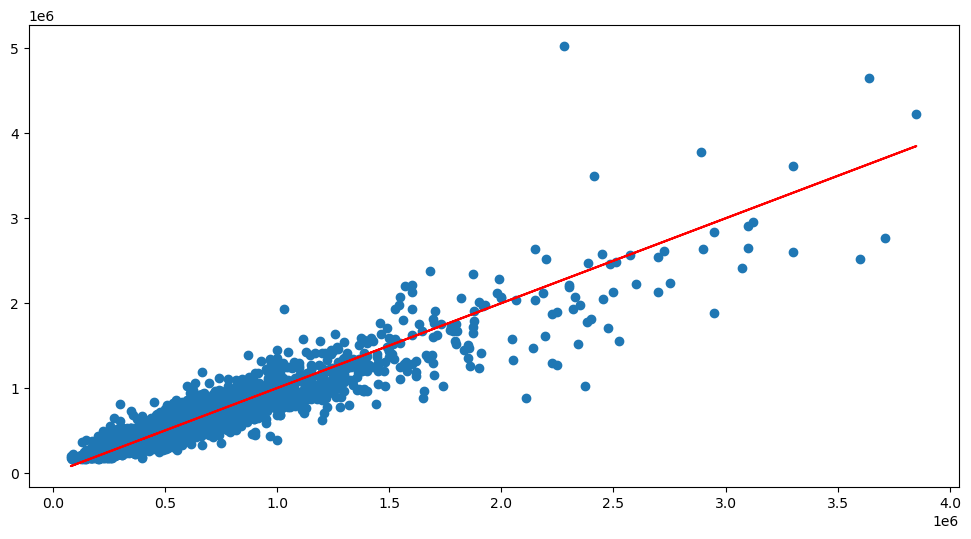

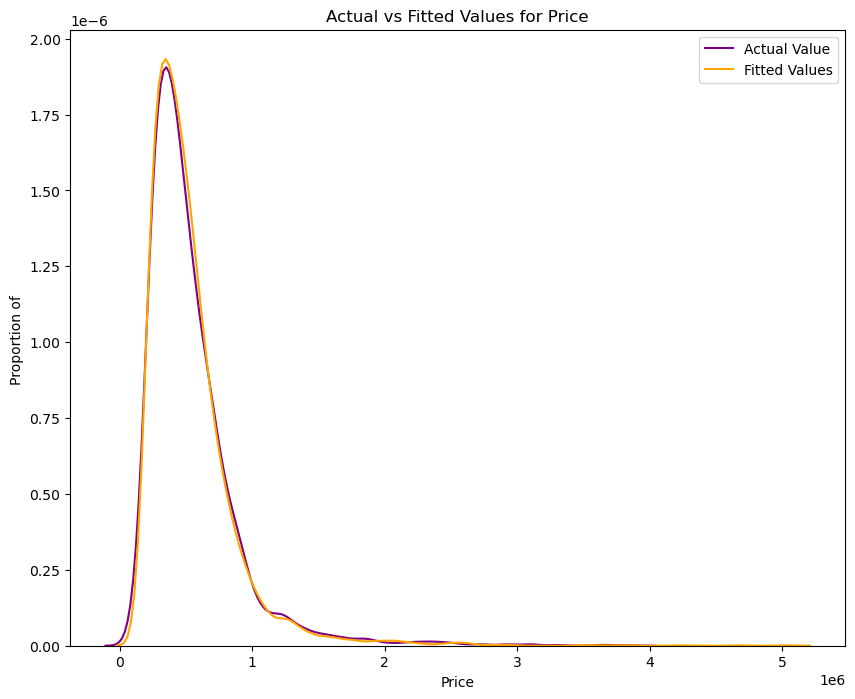

<AxesSubplot:>

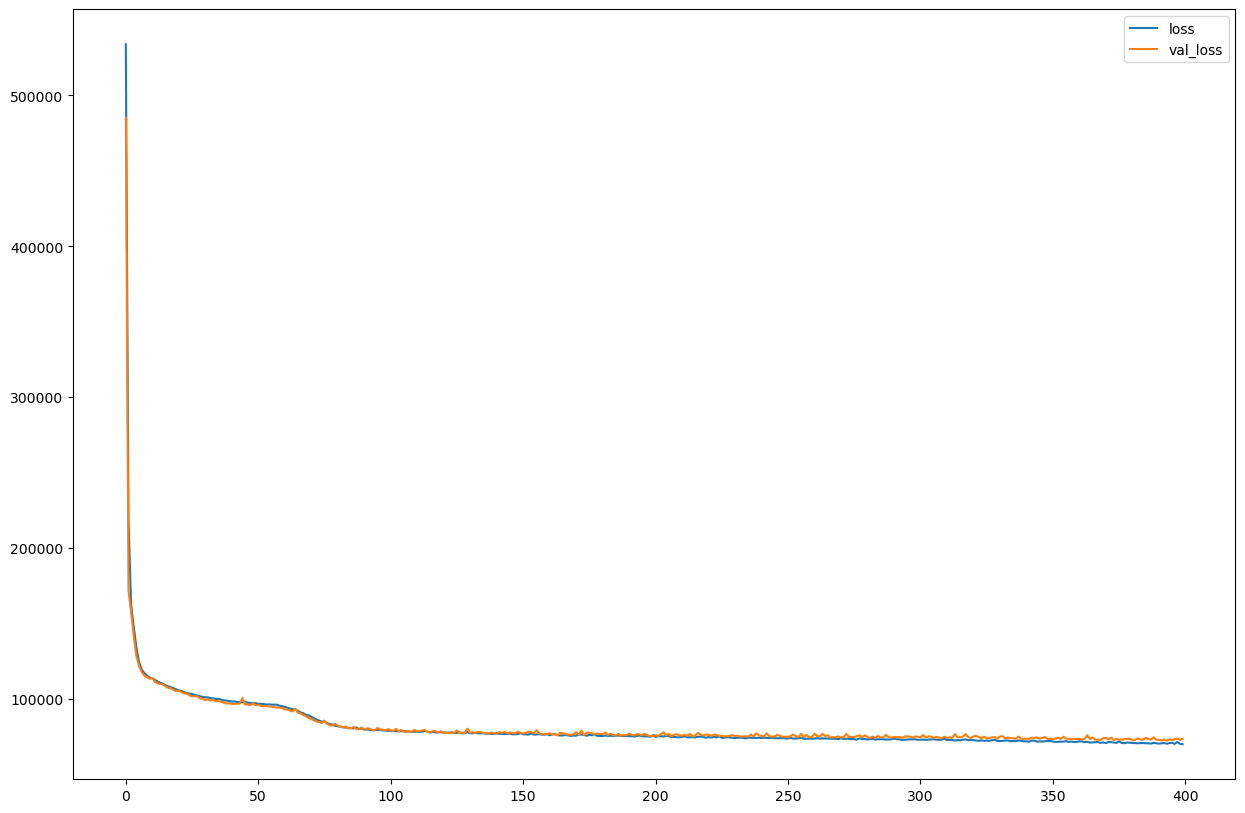

In [685]:
plt.figure(figsize = (12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

plt.figure(figsize=(10, 8))
a = sns.kdeplot(y_test, color="purple", label="Actual Value")
sns.kdeplot(predictions[:,0], color="orange", label="Fitted Values")
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of ')
plt.legend()
plt.show()
plt.close()

pd.DataFrame(history.history).plot(figsize=(15,10))

In [686]:
model = Sequential()
model.add(Dense(x_size,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(x_size,activation='relu'))
model.add(Dense(1))
opt = Adam(learning_rate = 0.1)
model.compile(optimizer = opt, loss = 'mae')
history = model.fit(
    x= X_train,
    y= y_train,
    batch_size=128,
    epochs=400,
    validation_data=(X_valid, y_valid))

Epoch 1/400
95/95 [==============================] - 1s 4ms/step - loss: 168596.5469 - val_loss: 137952.7031
Epoch 2/400
95/95 [==============================] - 0s 3ms/step - loss: 125061.9297 - val_loss: 144340.7500
Epoch 3/400
95/95 [==============================] - 0s 3ms/step - loss: 118543.0156 - val_loss: 115154.9609
Epoch 4/400
95/95 [==============================] - 0s 3ms/step - loss: 116547.6016 - val_loss: 96481.9219
Epoch 5/400
95/95 [==============================] - 0s 3ms/step - loss: 114076.0859 - val_loss: 109735.0156
Epoch 6/400
95/95 [==============================] - 0s 3ms/step - loss: 101346.2422 - val_loss: 116896.1797
Epoch 7/400
95/95 [==============================] - 0s 3ms/step - loss: 99383.5312 - val_loss: 91472.1484
Epoch 8/400
95/95 [==============================] - 0s 3ms/step - loss: 98079.0391 - val_loss: 107713.5078
Epoch 9/400
95/95 [==============================] - 0s 3ms/step - loss: 107920.6484 - val_loss: 93238.6484
Epoch 10/400
95/95 [====

Epoch 77/400
95/95 [==============================] - 0s 3ms/step - loss: 83456.1016 - val_loss: 78906.4922
Epoch 78/400
95/95 [==============================] - 0s 3ms/step - loss: 83535.1953 - val_loss: 80701.8516
Epoch 79/400
95/95 [==============================] - 0s 3ms/step - loss: 80702.5234 - val_loss: 82331.1719
Epoch 80/400
95/95 [==============================] - 0s 3ms/step - loss: 83360.1797 - val_loss: 77012.3750
Epoch 81/400
95/95 [==============================] - 0s 3ms/step - loss: 82354.0391 - val_loss: 78651.2109
Epoch 82/400
95/95 [==============================] - 0s 3ms/step - loss: 83176.7578 - val_loss: 85512.9688
Epoch 83/400
95/95 [==============================] - 0s 3ms/step - loss: 81895.6953 - val_loss: 80158.5234
Epoch 84/400
95/95 [==============================] - 0s 3ms/step - loss: 83932.7734 - val_loss: 93786.5703
Epoch 85/400
95/95 [==============================] - 0s 3ms/step - loss: 83660.0781 - val_loss: 99655.4688
Epoch 86/400
95/95 [========

95/95 [==============================] - 0s 3ms/step - loss: 80145.6562 - val_loss: 78462.5781
Epoch 153/400
95/95 [==============================] - 0s 3ms/step - loss: 81454.1562 - val_loss: 93492.0625
Epoch 154/400
95/95 [==============================] - 0s 3ms/step - loss: 81193.2344 - val_loss: 79685.6250
Epoch 155/400
95/95 [==============================] - 0s 3ms/step - loss: 78577.4062 - val_loss: 83400.6484
Epoch 156/400
95/95 [==============================] - 0s 3ms/step - loss: 79218.1641 - val_loss: 82235.5391
Epoch 157/400
95/95 [==============================] - 0s 3ms/step - loss: 79125.1953 - val_loss: 87527.8047
Epoch 158/400
95/95 [==============================] - 0s 3ms/step - loss: 80073.6875 - val_loss: 77720.1484
Epoch 159/400
95/95 [==============================] - 0s 3ms/step - loss: 79722.7500 - val_loss: 79441.0547
Epoch 160/400
95/95 [==============================] - 0s 3ms/step - loss: 79918.7188 - val_loss: 91055.1953
Epoch 161/400
95/95 [============

95/95 [==============================] - 0s 3ms/step - loss: 80029.5781 - val_loss: 83336.5000
Epoch 228/400
95/95 [==============================] - 0s 4ms/step - loss: 78568.6719 - val_loss: 80539.1172
Epoch 229/400
95/95 [==============================] - 0s 4ms/step - loss: 79412.2969 - val_loss: 80203.3750
Epoch 230/400
95/95 [==============================] - 0s 3ms/step - loss: 79059.8984 - val_loss: 78385.2891
Epoch 231/400
95/95 [==============================] - 0s 3ms/step - loss: 81815.7656 - val_loss: 82188.0703
Epoch 232/400
95/95 [==============================] - 0s 3ms/step - loss: 80874.3359 - val_loss: 82824.4062
Epoch 233/400
95/95 [==============================] - 0s 3ms/step - loss: 79287.8516 - val_loss: 86090.4453
Epoch 234/400
95/95 [==============================] - 0s 3ms/step - loss: 79395.8438 - val_loss: 77965.3750
Epoch 235/400
95/95 [==============================] - 0s 3ms/step - loss: 78343.4531 - val_loss: 78039.9844
Epoch 236/400
95/95 [============

95/95 [==============================] - 0s 3ms/step - loss: 79486.7031 - val_loss: 77713.2891
Epoch 303/400
95/95 [==============================] - 0s 3ms/step - loss: 78791.0000 - val_loss: 77602.6719
Epoch 304/400
95/95 [==============================] - 0s 3ms/step - loss: 77325.4141 - val_loss: 79672.3594
Epoch 305/400
95/95 [==============================] - 0s 3ms/step - loss: 76856.6094 - val_loss: 78248.7812
Epoch 306/400
95/95 [==============================] - 0s 3ms/step - loss: 79013.7266 - val_loss: 77824.2734
Epoch 307/400
95/95 [==============================] - 0s 3ms/step - loss: 78677.7578 - val_loss: 81486.2500
Epoch 308/400
95/95 [==============================] - 0s 3ms/step - loss: 78979.4766 - val_loss: 79059.3125
Epoch 309/400
95/95 [==============================] - 0s 3ms/step - loss: 78821.8828 - val_loss: 79400.0469
Epoch 310/400
95/95 [==============================] - 0s 3ms/step - loss: 78130.3828 - val_loss: 77172.4219
Epoch 311/400
95/95 [============

95/95 [==============================] - 0s 3ms/step - loss: 78083.9141 - val_loss: 80317.8203
Epoch 378/400
95/95 [==============================] - 0s 3ms/step - loss: 77296.8047 - val_loss: 78147.2891
Epoch 379/400
95/95 [==============================] - 0s 3ms/step - loss: 77593.5859 - val_loss: 77971.6875
Epoch 380/400
95/95 [==============================] - 0s 3ms/step - loss: 76647.0078 - val_loss: 78188.2188
Epoch 381/400
95/95 [==============================] - 0s 3ms/step - loss: 77354.3594 - val_loss: 78618.2188
Epoch 382/400
95/95 [==============================] - 0s 3ms/step - loss: 78266.8281 - val_loss: 77768.6953
Epoch 383/400
95/95 [==============================] - 0s 3ms/step - loss: 76554.6797 - val_loss: 80126.6719
Epoch 384/400
95/95 [==============================] - 0s 3ms/step - loss: 79694.3906 - val_loss: 81052.4922
Epoch 385/400
95/95 [==============================] - 0s 3ms/step - loss: 79173.2266 - val_loss: 80700.0391
Epoch 386/400
95/95 [============

In [687]:
predictions=model.predict(X_test)
print("The absolute mean error :",mean_absolute_error(y_test, predictions))
sklearn.metrics.r2_score(y_test,predictions)

169/169 [==============================] - 0s 964us/step
The absolute mean error : 76265.6025455681


0.8439469089114431

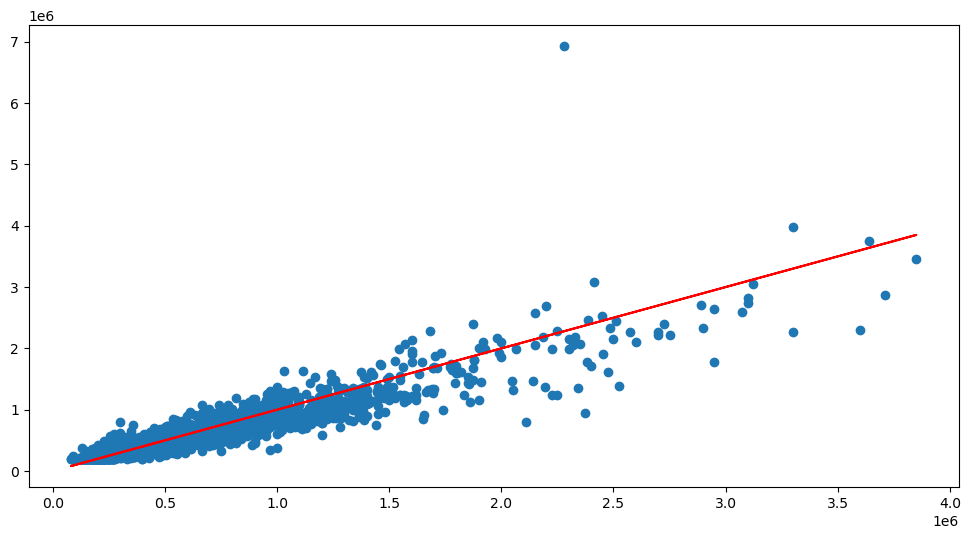

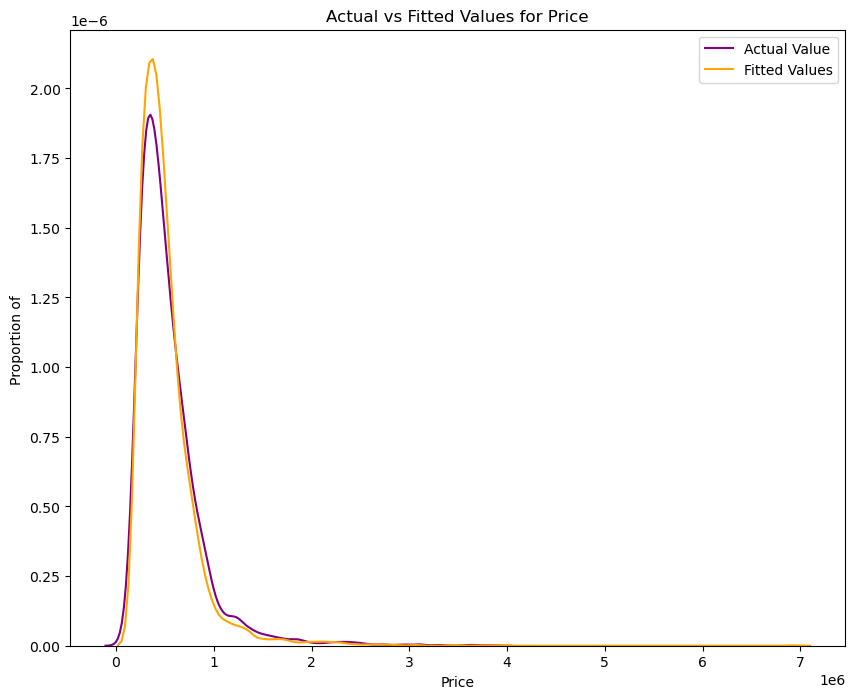

<AxesSubplot:>

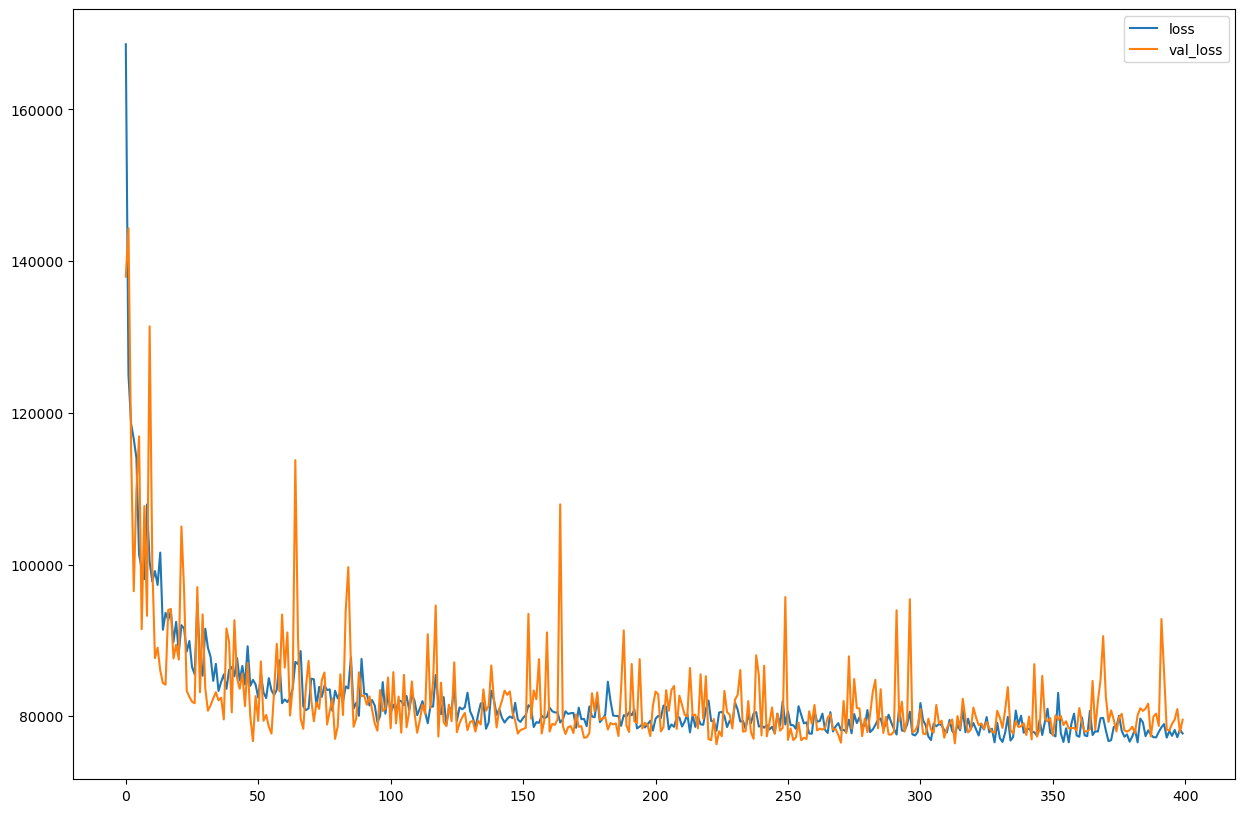

In [688]:
plt.figure(figsize = (12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

plt.figure(figsize=(10, 8))
a = sns.kdeplot(y_test, color="purple", label="Actual Value")
sns.kdeplot(predictions[:,0], color="orange", label="Fitted Values")
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of ')
plt.legend()
plt.show()
plt.close()

pd.DataFrame(history.history).plot(figsize=(15,10))